## 1.  Credit Risk 

Credit risk arises when a corporate or individual borrower fails to meet their debt obligations. It is the probability that the lender will not receive the principal and interest payments of a debt required to service the debt extended to a borrower. Credit risk will disrupt the lender’s cash flows and increase collection costs. 
The loss may be partial or complete, where the lender incurs a loss of part of the loan, or the entire loan extended to the borrower. The interest rate charged on a loan serves as the lender’s reward for accepting to bear credit risk. In real market system, banks charge a high interest rate for high-risk loans as a way of compensating for the high risk of default, borrower with a steady income and a good credit history can get credit at a lower interest rate than what high-risk borrowers.  
This is a creditdata of the customers from a financial institution. Agenda is to predict for loan_status based on the given features and help the financial institutions to take steps accordingly based on the findings for business operation effectiveness.

### 2. About the dataset

This dataset contains a uncleaned version of this dataset available at https://www.kaggle.com/datasets/laotse/credit-risk-dataset.
There are total 12 features with 1 target variable/dependent variable "loan_status".The data has 32581 observations with missing and duplicated values. The features data types include float64(3) features, int64(5)features and object(4) fetaures with different levels.

 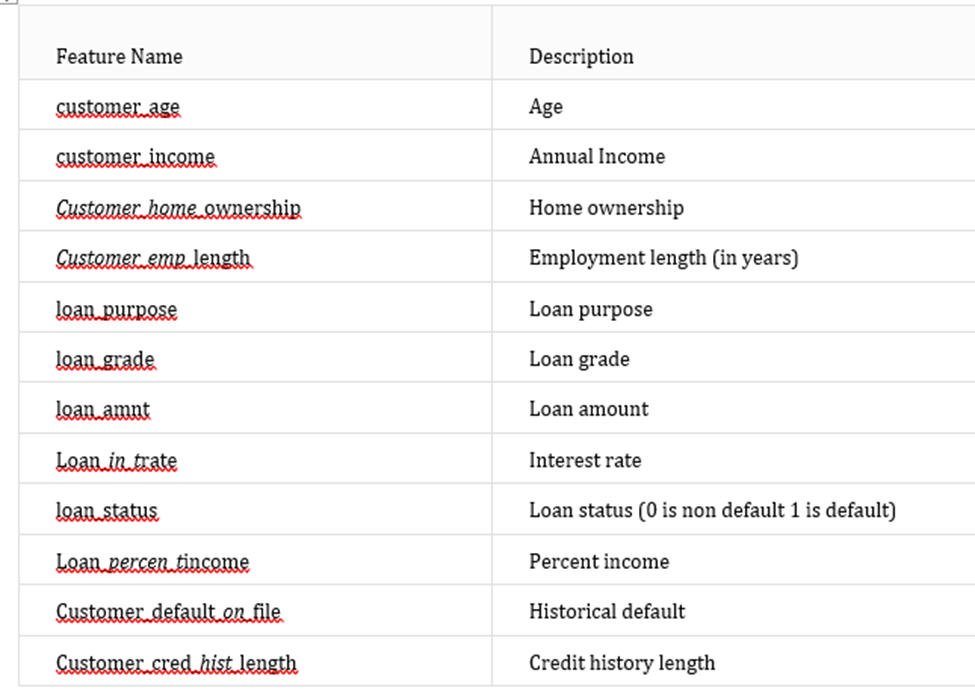

### 4. Changing working wirectory 

In [17]:
import os
os.chdir(r"C:\Toronto\Python Project\Credit Risk Dataset")
os.getcwd()

'C:\\Toronto\\Python Project\\Credit Risk Dataset'

### 5. Importing libraries

In [18]:
import pandas as pd
import numpy as np 
# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [19]:
import warnings
warnings.filterwarnings('ignore')
 #Reading the Dataset 
df= pd.read_csv("credit_risk_dataset -1.csv")

### 6. Getting fimiliar with data

In [5]:
# Getting data type of varibles
# Method 1
df.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_cred_hist_length      int64
cb_person_default_on_file      object
dtype: object

In [5]:
#Method 2
df.info() # From 12 features, 4 are categorical and 8 numerical columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_cred_hist_length  32581 non-null  int64  
 11  cb_person_default_on_file   32581 non-null  object 
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [6]:
# Getting the shape of the dataset 
df.shape

(32581, 12)

### Rename columns  using rename function

In [20]:
df=df.rename(columns={'person_age':'customer_age','person_income':'customer_income','person_home_ownership':'customer_home_ownership','person_emp_length':'customer_emp_length','loan_intent':'loan_purpose','cb_person_cred_hist_length': 'customer_cred_hist_length','cb_person_default_on_file':'customer_default_on_file'})

In [18]:
df.head()

,customer_age,customer_income,customer_home_ownership,customer_emp_length,loan_purpose,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,customer_cred_hist_length,customer_default_on_file
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,3,Y
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,2,N
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,3,N
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,2,N
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,4,Y


In [19]:
df.tail()

,customer_age,customer_income,customer_home_ownership,customer_emp_length,loan_purpose,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,customer_cred_hist_length,customer_default_on_file
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,30,N
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,19,N
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,28,N
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,26,N
32580,66,42000,RENT,2.0,MEDICAL,B,6475,9.99,0,0.15,30,N


### 7. Unique Values 

In [20]:
df.apply(lambda x: len(x.unique()))

customer_age                   58
customer_income              4295
customer_home_ownership         4
customer_emp_length            37
loan_purpose                    6
loan_grade                      7
loan_amnt                     753
loan_int_rate                 349
loan_status                     2
loan_percent_income            77
customer_cred_hist_length      29
customer_default_on_file        2
dtype: int64

### 8. Handling missing Values

In [21]:
#method 1
df.apply(lambda x: sum(x.isnull()))

customer_age                    0
customer_income                 0
customer_home_ownership         0
customer_emp_length           895
loan_purpose                    0
loan_grade                      0
loan_amnt                       0
loan_int_rate                3116
loan_status                     0
loan_percent_income             0
customer_cred_hist_length       0
customer_default_on_file        0
dtype: int64

In [22]:
# method 2
df.isnull().sum()

customer_age                    0
customer_income                 0
customer_home_ownership         0
customer_emp_length           895
loan_purpose                    0
loan_grade                      0
loan_amnt                       0
loan_int_rate                3116
loan_status                     0
loan_percent_income             0
customer_cred_hist_length       0
customer_default_on_file        0
dtype: int64

In [7]:
#calculatin no. of missing values for each column and it's percentage
def percentage_of_miss():
  df1=df[df.columns[df.isnull().sum()>=1]]# I get a subset of data that contain columns that have at least one missing values
  total_miss = df1.isnull().sum().sort_values(ascending=False)
  percent_miss = ((df.isnull().sum()/df1.isnull().count())*100).sort_values(ascending=False)
  missing_data = pd.concat([total_miss, percent_miss], axis=1, keys=['Number of Missing', 'Percentage'])
  return(missing_data)

In [63]:
percentage_of_miss()

,Number of Missing,Percentage
loan_int_rate,3116.00,9.56
customer_emp_length,895.00,2.75
customer_age,NaN,NaN
customer_cred_hist_length,NaN,NaN
customer_default_on_file,NaN,NaN
customer_home_ownership,NaN,NaN
customer_income,NaN,NaN
loan_amnt,NaN,NaN
loan_grade,NaN,NaN
loan_percent_income,NaN,NaN


### 9. Replacing the missing Values 

In [22]:
# customer_emp_length has 895 missing values. This missing values replaced by mean of person employement lenght 
df['customer_emp_length'].fillna(df['customer_emp_length'].mean(), inplace=True)

In [24]:
df.apply(lambda x: sum(x.isnull()),axis=0) ## The loan_int_rate 3116 missing values replaced by mean of loan_int_rate 

customer_age                    0
customer_income                 0
customer_home_ownership         0
customer_emp_length             0
loan_purpose                    0
loan_grade                      0
loan_amnt                       0
loan_int_rate                3116
loan_status                     0
loan_percent_income             0
customer_cred_hist_length       0
customer_default_on_file        0
dtype: int64

In [25]:
df['loan_int_rate'].fillna(df['loan_int_rate'].mean(), inplace=True)

In [26]:
df.apply(lambda x: sum(x.isnull()),axis=0) ## The loan_int_rate 3116 missing values replaced by mean of loan_int_rate  

customer_age                 0
customer_income              0
customer_home_ownership      0
customer_emp_length          0
loan_purpose                 0
loan_grade                   0
loan_amnt                    0
loan_int_rate                0
loan_status                  0
loan_percent_income          0
customer_cred_hist_length    0
customer_default_on_file     0
dtype: int64

In [67]:
df.info() # Each of the missing values are replaced by their mean values of each column 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer_age               32581 non-null  int64  
 1   customer_income            32581 non-null  int64  
 2   customer_home_ownership    32581 non-null  object 
 3   customer_emp_length        32581 non-null  float64
 4   loan_purpose               32581 non-null  object 
 5   loan_grade                 32581 non-null  object 
 6   loan_amnt                  32581 non-null  int64  
 7   loan_int_rate              32581 non-null  float64
 8   loan_status                32581 non-null  int64  
 9   loan_percent_income        32581 non-null  float64
 10  customer_cred_hist_length  32581 non-null  int64  
 11  customer_default_on_file   32581 non-null  object 
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


### 10. Handlingd duplicate values 

In [27]:
#Method #1
df_nodub=df.drop_duplicates()
print(df.shape,df_nodub.shape,'\n Number of duplicate data : ',df.shape[0]-df_nodub.shape[0])
# The number of the duplicate data is 165 and I have to find where the duplication comes?

(32581, 12) (32416, 12) 
 Number of duplicate data :  165


In [28]:
#method #2
dups=df.duplicated() # The list of dataset values duplicated 
df[dups] 

,customer_age,customer_income,customer_home_ownership,customer_emp_length,loan_purpose,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,customer_cred_hist_length,customer_default_on_file
15975,23,42000,RENT,5.0,VENTURE,B,6000,9.990000,0,0.14,4,N
15989,23,90000,MORTGAGE,7.0,EDUCATION,B,8000,10.360000,0,0.09,3,N
15995,24,48000,MORTGAGE,4.0,MEDICAL,A,4000,5.420000,0,0.08,4,N
16025,24,10000,RENT,8.0,PERSONAL,A,3000,7.900000,1,0.30,3,N
16028,23,100000,MORTGAGE,7.0,EDUCATION,A,15000,7.880000,0,0.15,4,N
...,...,...,...,...,...,...,...,...,...,...,...,...
32010,42,39996,MORTGAGE,2.0,HOMEIMPROVEMENT,A,2500,5.420000,0,0.06,12,N
32047,36,250000,RENT,2.0,DEBTCONSOLIDATION,A,20000,7.880000,0,0.08,17,N
32172,49,120000,MORTGAGE,12.0,MEDICAL,B,12000,10.990000,0,0.10,12,N
32259,39,40000,OWN,4.0,VENTURE,B,1000,10.370000,0,0.03,16,N


In [17]:
df.query("customer_age==24&customer_income==42000&\
customer_home_ownership=='RENT'&loan_int_rate==9.99")# As age 23 as sample data, all the values are same and shows 
#unlikely not duplicated and hence droped 

,customer_age,customer_income,customer_home_ownership,customer_emp_length,loan_purpose,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,customer_cred_hist_length,customer_default_on_file
6464,23,42000,RENT,5.0,VENTURE,B,6000,9.99,0,0.14,4,N
15975,23,42000,RENT,5.0,VENTURE,B,6000,9.99,0,0.14,4,N


In [18]:
df.shape

(32581, 12)

In [29]:
df.drop_duplicates(inplace=True)

In [15]:
df.shape  # Originally we have 32581 observations and 165 duplicate values droped

(32416, 12)

In [6]:
df.describe() # The data set has max age 144 which is data entry error and I have to remove plus the there is no employement 
               # length of 123 years in real world and has to be removed

,customer_age,customer_income,customer_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,customer_cred_hist_length
count,32581.00,32581.00,31686.00,32581.00,29465.00,32581.00,32581.00,32581.00
mean,27.73,66074.85,4.79,9589.37,11.01,0.22,0.17,5.80
std,6.35,61983.12,4.14,6322.09,3.24,0.41,0.11,4.06
min,20.00,4000.00,0.00,500.00,5.42,0.00,0.00,2.00
25%,23.00,38500.00,2.00,5000.00,7.90,0.00,0.09,3.00
50%,26.00,55000.00,4.00,8000.00,10.99,0.00,0.15,4.00
75%,30.00,79200.00,7.00,12200.00,13.47,0.00,0.23,8.00
max,144.00,6000000.00,123.00,35000.00,23.22,1.00,0.83,30.00


In [30]:
df.loc[df["customer_age"]>=80,:] # The data set has 8 records with customer age greater tah or equal to 80 years. 
                                  # A person more than 80 years usually not apply for loan and the model generalize better  

,customer_age,customer_income,customer_home_ownership,customer_emp_length,loan_purpose,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,customer_cred_hist_length,customer_default_on_file
81,144,250000,RENT,4.0,VENTURE,C,4800,13.570000,0,0.02,3,N
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.860000,0,0.03,2,N
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.250000,0,0.25,3,N
747,123,78000,RENT,7.0,VENTURE,B,20000,11.011695,0,0.26,4,N
32297,144,6000000,MORTGAGE,12.0,PERSONAL,C,5000,12.730000,0,0.00,25,N
32416,94,24000,RENT,1.0,MEDICAL,C,6500,11.011695,0,0.27,27,N
32422,80,64000,RENT,7.0,MEDICAL,B,6800,11.710000,0,0.11,25,N
32506,84,94800,MORTGAGE,2.0,PERSONAL,A,10000,7.510000,0,0.11,24,N


In [31]:
df=df.loc[df["customer_age"]<80,:]

In [16]:
df.shape

(32408, 12)

##### ====================================================================================================================

### 9. The frequency of categorical values with level

In [61]:
#Filter categorical variables
categorical_columns = [x for x in df.dtypes.index if df.dtypes[x]=='object']
#Exclude ID cols and source:
categorical_columns = [x for x in categorical_columns 
                       if x not in ['Item_Identifier','Outlet_Identifier','source']]
#Print frequency of categories
for col in categorical_columns:
    print ('\nFrequency of Catagries varible %s'%col)
    print (df[col].value_counts() )
    print('=======================================================')


Frequency of Catagries varible customer_home_ownership
RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: customer_home_ownership, dtype: int64

Frequency of Catagries varible loan_purpose
EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: loan_purpose, dtype: int64

Frequency of Catagries varible loan_grade
A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: loan_grade, dtype: int64

Frequency of Catagries varible customer_default_on_file
N    26836
Y     5745
Name: customer_default_on_file, dtype: int64


## Univariate analysis of numeric features 

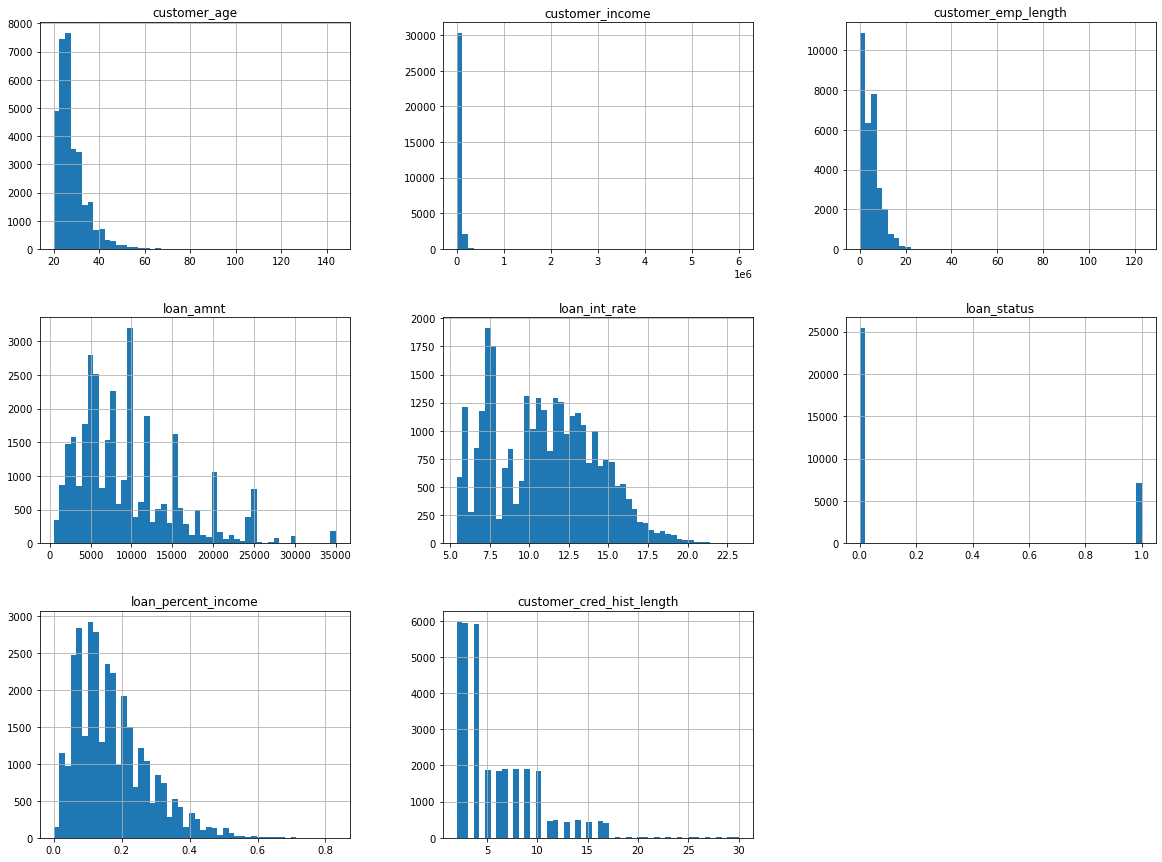

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt 
df.hist(bins=50, figsize=(20,15)) # all the numeric columns of the dataset are right(positive) skewed and a large number of data values occur on the left side with a plt.show()                                  
plt.show()                        # fewer number of data values on the right side

In [14]:
df['customer_age'].describe()

count   32581.00
mean       27.73
std         6.35
min        20.00
25%        23.00
50%        26.00
75%        30.00
max       144.00
Name: customer_age, dtype: float64

<AxesSubplot:xlabel='customer_age', ylabel='Density'>

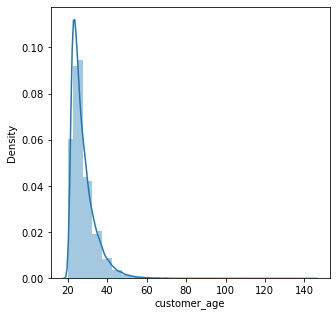

In [55]:
sns.distplot(df['customer_age']) # The customer_age data distribution is right skewed 

In [15]:
#skewness and kurtosis
print("Skewness: %f" % df['customer_age'].skew())
print("Kurtosis: %f" % df['customer_age'].kurt())

Skewness: 2.581393
Kurtosis: 18.560825


<AxesSubplot:ylabel='customer_age'>

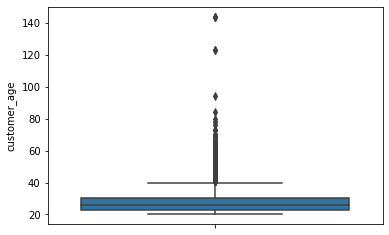

In [11]:
sns.boxplot( y=df['customer_age'] ) # Customerage has outliers and will fix later 

In [17]:
df['customer_income'].describe()

count     32581.00
mean      66074.85
std       61983.12
min        4000.00
25%       38500.00
50%       55000.00
75%       79200.00
max     6000000.00
Name: customer_income, dtype: float64

<AxesSubplot:xlabel='customer_income', ylabel='Density'>

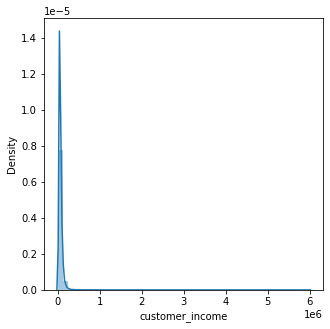

In [56]:
sns.distplot(df['customer_income'])

In [20]:
#skewness and kurtosis
print("Skewness: %f" % df['customer_income'].skew())
print("Kurtosis: %f" % df['customer_income'].kurt())

Skewness: 32.865349
Kurtosis: 2693.272776


In [23]:
df['customer_emp_length'].describe() # there is record error in employement lenght of the customer that no one has a lenght of 123 years

count   31686.00
mean        4.79
std         4.14
min         0.00
25%         2.00
50%         4.00
75%         7.00
max       123.00
Name: customer_emp_length, dtype: float64

<AxesSubplot:xlabel='customer_emp_length', ylabel='Density'>

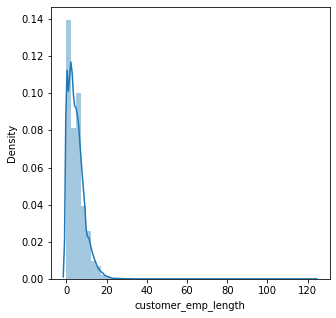

In [57]:
sns.distplot(df['customer_emp_length'])# It is right skewed 

<AxesSubplot:ylabel='customer_age'>

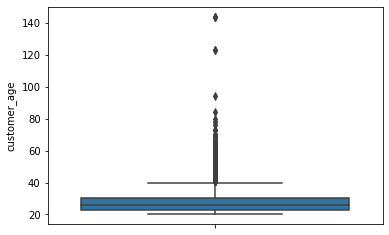

In [25]:
sns.boxplot( y=df['customer_age'])

In [24]:
#skewness and kurtosis
print("Skewness: %f" % df['customer_emp_length'].skew())
print("Kurtosis: %f" % df['customer_emp_length'].kurt())

Skewness: 2.614455
Kurtosis: 43.722338


In [27]:
df['loan_amnt'].describe()

count   32581.00
mean     9589.37
std      6322.09
min       500.00
25%      5000.00
50%      8000.00
75%     12200.00
max     35000.00
Name: loan_amnt, dtype: float64

<AxesSubplot:xlabel='loan_amnt', ylabel='Density'>

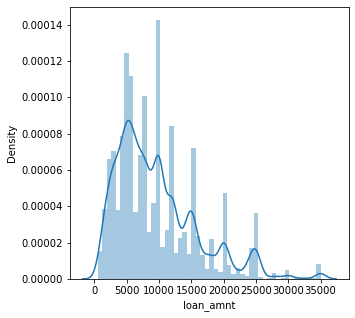

In [58]:
sns.distplot(df['loan_amnt'])# roght skewed 

In [30]:
#skewness and kurtosis
print("Skewness: %f" % df['customer_emp_length'].skew())
print("Kurtosis: %f" % df['customer_emp_length'].kurt()) # right skewed 

Skewness: 2.614455
Kurtosis: 43.722338


<AxesSubplot:ylabel='loan_amnt'>

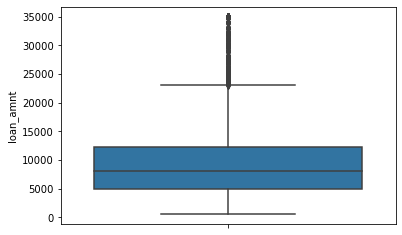

In [29]:
sns.boxplot( y=df['loan_amnt'] ) # Loan amount has outliers. There is much differnece between 75% and max value

In [32]:
df['loan_int_rate'].describe()

count   29465.00
mean       11.01
std         3.24
min         5.42
25%         7.90
50%        10.99
75%        13.47
max        23.22
Name: loan_int_rate, dtype: float64

In [34]:
#skewness and kurtosis
print("Skewness: %f" % df['loan_int_rate'].skew())
print("Kurtosis: %f" % df['loan_int_rate'].kurt()) # right skewed 

Skewness: 0.208550
Kurtosis: -0.671609


<AxesSubplot:ylabel='loan_int_rate'>

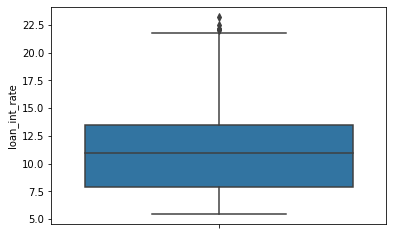

In [35]:
sns.boxplot( y=df['loan_int_rate'] ) # loan_int_rate has outliers 

In [36]:
df['loan_percent_income'].describe()

count   32581.00
mean        0.17
std         0.11
min         0.00
25%         0.09
50%         0.15
75%         0.23
max         0.83
Name: loan_percent_income, dtype: float64

In [37]:
#skewness and kurtosis
print("Skewness: %f" % df['loan_percent_income'].skew())
print("Kurtosis: %f" % df['loan_percent_income'].kurt()) # right skewed 

Skewness: 1.064669
Kurtosis: 1.223687


<AxesSubplot:ylabel='loan_percent_income'>

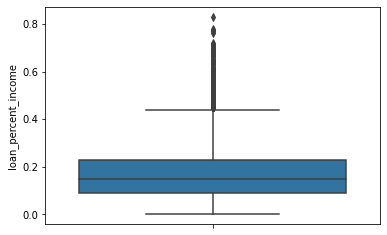

In [38]:
sns.boxplot( y=df['loan_percent_income'] )

In [39]:
df['customer_cred_hist_length'].describe()

count   32581.00
mean        5.80
std         4.06
min         2.00
25%         3.00
50%         4.00
75%         8.00
max        30.00
Name: customer_cred_hist_length, dtype: float64

In [40]:
#skewness and kurtosis
print("Skewness: %f" % df['loan_percent_income'].skew())
print("Kurtosis: %f" % df['loan_percent_income'].kurt()) # right skewed 

Skewness: 1.064669
Kurtosis: 1.223687


<AxesSubplot:ylabel='customer_cred_hist_length'>

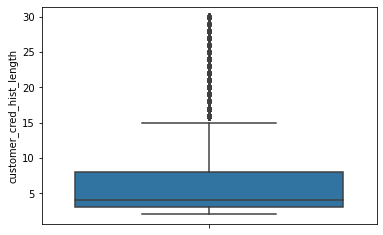

In [41]:
sns.boxplot( y=df['customer_cred_hist_length'] ) #ustomer_cred_hist_length feature has outliers. The difference between &75% and max is 
 # 22 which is high and will be fixed later

### 11. Statistical summary of numeric values of the dataset

In [28]:
# Getting the summary statestical of Data
pd.options.display.float_format = "{:.2f}".format
df.describe()

,customer_age,customer_income,customer_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,customer_cred_hist_length,loan_ratio_cred_hist_length
count,32408.00,32408.00,32408.00,32408.00,32408.00,32408.00,32408.00,32408.00,32408.00
mean,27.72,65898.41,4.79,9593.76,11.02,0.22,0.17,5.81,2395.38
std,6.19,52522.60,4.09,6322.78,3.08,0.41,0.11,4.05,2217.02
min,20.00,4000.00,0.00,500.00,5.42,0.00,0.00,2.00,34.48
25%,23.00,38500.00,2.00,5000.00,8.49,0.00,0.09,3.00,866.67
50%,26.00,55000.00,4.00,8000.00,11.01,0.00,0.15,4.00,1675.00
75%,30.00,79200.00,7.00,12250.00,13.11,0.00,0.23,8.00,3166.67
max,78.00,2039784.00,123.00,35000.00,23.22,1.00,0.83,30.00,17500.00


### 12. Linear association of  numeric value of the dataset

In [54]:
df.corr() # The result shows degree of  linear relationshion among variables
          # customer_cred_hist_length with customer_age, and loan_percent_income with loan_amnt has strong or high correlation. But the rest of the features have
          # weak and negatively correlations 

,customer_age,customer_income,customer_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,customer_cred_hist_length
customer_age,1.00,0.17,0.16,0.05,0.01,-0.02,-0.04,0.86
customer_income,0.17,1.00,0.13,0.27,0.00,-0.14,-0.25,0.12
customer_emp_length,0.16,0.13,1.00,0.11,-0.06,-0.08,-0.05,0.14
loan_amnt,0.05,0.27,0.11,1.00,0.15,0.11,0.57,0.04
loan_int_rate,0.01,0.00,-0.06,0.15,1.00,0.34,0.12,0.02
loan_status,-0.02,-0.14,-0.08,0.11,0.34,1.00,0.38,-0.02
loan_percent_income,-0.04,-0.25,-0.05,0.57,0.12,0.38,1.00,-0.03
customer_cred_hist_length,0.86,0.12,0.14,0.04,0.02,-0.02,-0.03,1.00


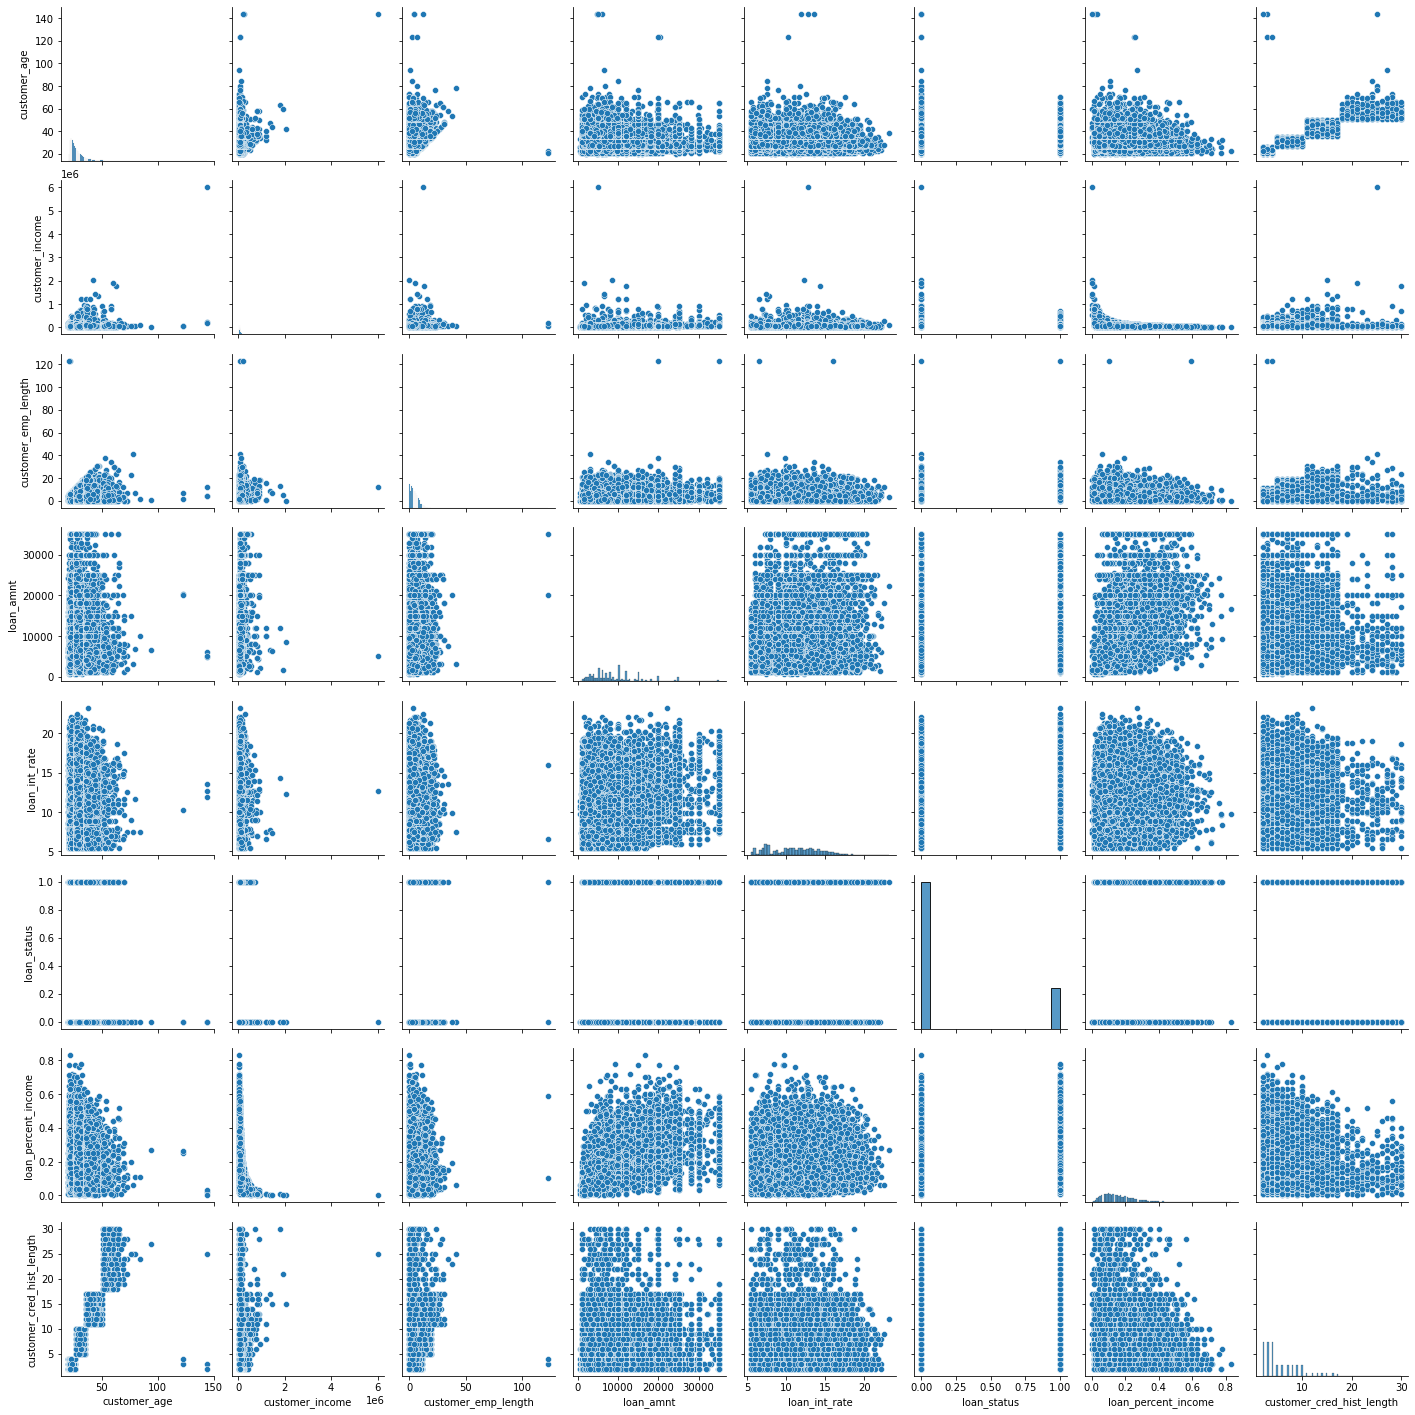

In [52]:
sns.pairplot(df)

<AxesSubplot:>

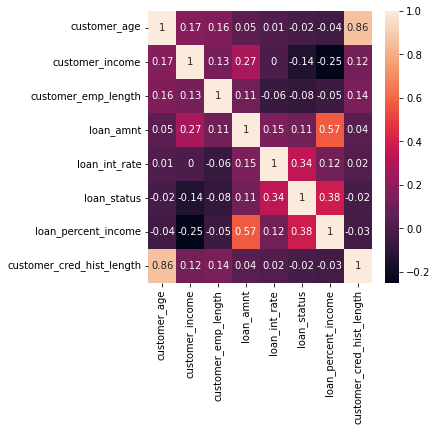

In [53]:
sns.heatmap(np.round(df.corr(),2), annot=True)

### 13. The frequency of categorical values with level

In [61]:
#Filter categorical variables
categorical_columns = [x for x in df.dtypes.index if df.dtypes[x]=='object']
#Exclude ID cols and source:
categorical_columns = [x for x in categorical_columns 
                       if x not in ['Item_Identifier','Outlet_Identifier','source']]
#Print frequency of categories
for col in categorical_columns:
    print ('\nFrequency of Catagries varible %s'%col)
    print (df[col].value_counts() )
    print('=======================================================')


Frequency of Catagries varible customer_home_ownership
RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: customer_home_ownership, dtype: int64

Frequency of Catagries varible loan_purpose
EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: loan_purpose, dtype: int64

Frequency of Catagries varible loan_grade
A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: loan_grade, dtype: int64

Frequency of Catagries varible customer_default_on_file
N    26836
Y     5745
Name: customer_default_on_file, dtype: int64


### 10. Categorical column Levels of the each feature 

In [39]:
df['loan_purpose'].value_counts() # loan_intent columns has 6 levels 

EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: loan_purpose, dtype: int64

In [41]:
df['customer_default_on_file'].value_counts() # cb_person_default_on_file is the target and have two levels 

N    26836
Y     5745
Name: customer_default_on_file, dtype: int64

In [42]:
df['loan_status'].value_counts()

0    25473
1     7108
Name: loan_status, dtype: int64

## 14. Feature Engineering 
customer_home_ownership column has four levels. The variable "OTHER" is not relevant to provide statestical explanation 
                                             and I want to merge and 107 value counts with 'OWN'

In [22]:
df['customer_home_ownership'].value_counts() 

RENT        16373
MORTGAGE    13366
OWN          2563
OTHER         106
Name: customer_home_ownership, dtype: int64

In [36]:
print ('Modified Categories:')
df['customer_home_ownership'] = df['customer_home_ownership'].replace({'OTHER':'OWN'})
                                                                                                                                                 
print (df['customer_home_ownership'].value_counts())

Modified Categories:
RENT        16373
MORTGAGE    13366
OWN          2669
Name: customer_home_ownership, dtype: int64


In [37]:
df['loan_grade'].value_counts() # loan_grade coulumn has 7 levels. I want to limit from 7 to 5 Levels and I will merge
                              # "F" and "G" to level "E"

A    10702
B    10383
C     6435
D     3620
E      963
F      241
G       64
Name: loan_grade, dtype: int64

In [38]:
print ('Modified Categories:')
df['loan_grade'] = df['loan_grade'].replace({'F':'E',
                                              'G':'E' })                                                                                                                                             
print (df['loan_grade'].value_counts())

Modified Categories:
A    10702
B    10383
C     6435
D     3620
E     1268
Name: loan_grade, dtype: int64


In [50]:
df.head()

,customer_age,customer_income,customer_home_ownership,customer_emp_length,loan_purpose,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,customer_cred_hist_length,customer_default_on_file
0,22,59000,RENT,123.00,PERSONAL,D,35000,16.02,1,0.59,3,Y
1,21,9600,OWN,5.00,EDUCATION,B,1000,11.14,0,0.10,2,N
2,25,9600,MORTGAGE,1.00,MEDICAL,C,5500,12.87,1,0.57,3,N
3,23,65500,RENT,4.00,MEDICAL,C,35000,15.23,1,0.53,2,N
4,24,54400,RENT,8.00,MEDICAL,C,35000,14.27,1,0.55,4,Y


Creating new feature as loan_ratio_cred_hist_length based on existing features loan_amnt and customer_cred_hist_length. This new variable help to predict customer's loan_status based on the ratio variable value 

In [51]:
df['loan_amnt'].describe()

count   32416.00
mean     9593.85
std      6322.73
min       500.00
25%      5000.00
50%      8000.00
75%     12250.00
max     35000.00
Name: loan_amnt, dtype: float64

In [39]:
#loan_cred_hist_length:
df['loan_ratio_cred_hist_length'] = df['loan_amnt'] / df['customer_cred_hist_length']
df['loan_ratio_cred_hist_length'].describe()

count   32408.00
mean     2395.38
std      2217.02
min        34.48
25%       866.67
50%      1675.00
75%      3166.67
max     17500.00
Name: loan_ratio_cred_hist_length, dtype: float64

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32408 entries, 0 to 32580
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   customer_age                 32408 non-null  int64  
 1   customer_income              32408 non-null  int64  
 2   customer_home_ownership      32408 non-null  object 
 3   customer_emp_length          32408 non-null  float64
 4   loan_purpose                 32408 non-null  object 
 5   loan_grade                   32408 non-null  object 
 6   loan_amnt                    32408 non-null  int64  
 7   loan_int_rate                32408 non-null  float64
 8   loan_status                  32408 non-null  int64  
 9   loan_percent_income          32408 non-null  float64
 10  customer_cred_hist_length    32408 non-null  int64  
 11  customer_default_on_file     32408 non-null  object 
 12  loan_ratio_cred_hist_length  32408 non-null  float64
dtypes: float64(4), i

In [31]:
df.head()

,customer_age,customer_income,customer_home_ownership,customer_emp_length,loan_purpose,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,customer_cred_hist_length,customer_default_on_file,loan_ratio_cred_hist_length
0,22,59000,RENT,123.00,PERSONAL,D,35000,16.02,1,0.59,3,Y,11666.67
1,21,9600,OWN,5.00,EDUCATION,B,1000,11.14,0,0.10,2,N,500.00
2,25,9600,MORTGAGE,1.00,MEDICAL,C,5500,12.87,1,0.57,3,N,1833.33
3,23,65500,RENT,4.00,MEDICAL,C,35000,15.23,1,0.53,2,N,17500.00
4,24,54400,RENT,8.00,MEDICAL,C,35000,14.27,1,0.55,4,Y,8750.00


### UNIVARIATE AND BIVARIATE ANAYSIS

### Going through columns one by one

In [174]:
df.head()

,customer_age,customer_income,customer_home_ownership,customer_emp_length,loan_purpose,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,customer_cred_hist_length,customer_default_on_file,loan_cred_hist_length
0,22,59000,RENT,123.00,PERSONAL,D,35000,16.02,1,0.59,3,Y,11666.67
1,21,9600,OWN,5.00,EDUCATION,B,1000,11.14,0,0.10,2,N,500.00
2,25,9600,MORTGAGE,1.00,MEDICAL,C,5500,12.87,1,0.57,3,N,1833.33
3,23,65500,RENT,4.00,MEDICAL,C,35000,15.23,1,0.53,2,N,17500.00
4,24,54400,RENT,8.00,MEDICAL,C,35000,14.27,1,0.55,4,Y,8750.00


In [177]:
df['customer_home_ownership'].value_counts() 

RENT        16446
MORTGAGE    13444
OWN          2691
Name: customer_home_ownership, dtype: int64

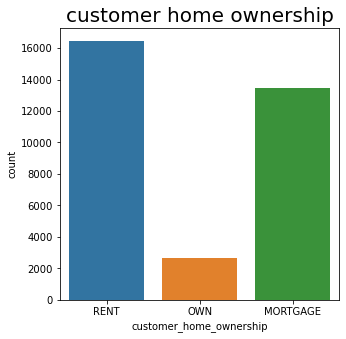

In [187]:
sns.countplot(df["customer_home_ownership"])
plt.title("customer home ownership", y=1, fontdict={"fontsize": 20})
plt.show()

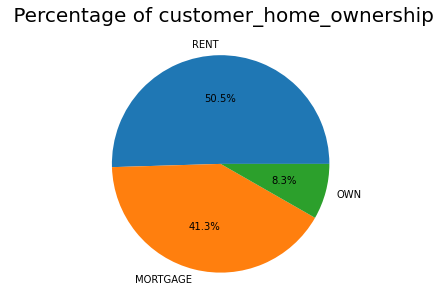

In [188]:
stat=df["customer_home_ownership"].value_counts()
plt.rcParams["figure.figsize"] = (5,5)
plt.pie(stat, labels= stat.index, autopct='%.1f%%')
plt.title(" Percentage of customer_home_ownership", y=1, fontdict={"fontsize": 20})
plt.show() 

#### From the home ownership pie chart of customers, we can understand that 50.5% of them are living in rent, 41.3% of them have mortgage for their homes,  and only 8.3% of customers have their own home.

In [182]:
df['loan_purpose'].value_counts() 

EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: loan_purpose, dtype: int64

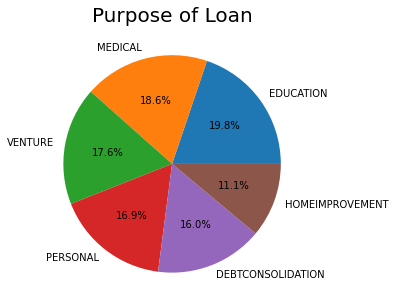

In [183]:
stat=df['loan_purpose'].value_counts()
plt.rcParams["figure.figsize"] = (5,5)
plt.pie(stat, labels= stat.index, autopct='%.1f%%')
plt.title("Purpose of Loan", y=1, fontdict={"fontsize": 20})
plt.show()

#### 4th. Conclution:  Customers use loan for various intet or purposes, Education 19.8%, Medical 18.6%, for business venture17.6%, personal 16.9%, debt consolidation 16% and 11.1 of them for home improvement purpose 

Text(0.5, 1, 'loan_grade')

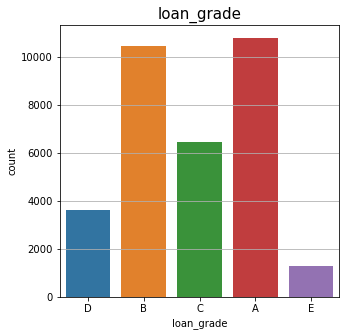

In [186]:
#countplot
df['loan_grade'].hist(bins=15)  # The loan grades in decreasing order 'A' is 33.08%, 'B' 32.08%, 'C' 19.82%, 'D' 11.13%, 'E' 2.96%, 'F' 0.74% and 'G' 0.20%
sns.countplot(df['loan_grade'])
plt.title('loan_grade', y=1, fontdict={'fontsize': 15})

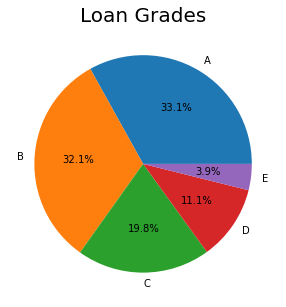

In [189]:
stat=df['loan_grade'].value_counts()
plt.rcParams["figure.figsize"] = (5,5)
plt.pie(stat, labels= stat.index, autopct='%.1f%%')
plt.title("Loan Grades", y=1, fontdict={"fontsize": 20})
plt.show()

### Conclusion: Based on the bank loan grade profiling, loan grade "A=33.1%" is the highest followed by loan grade "B=32.1%" and "C =19.8%" is the third. This shows that most of the loan users(85%) include  in A,B and C.  

<AxesSubplot:xlabel='customer_default_on_file'>

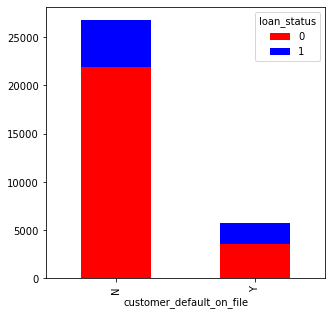

In [169]:
temp = pd.crosstab(df['customer_default_on_file'], df['loan_status'])
temp.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

In [47]:
# Looking the distribution of the historical record of the customers default  
df['customer_default_on_file'].value_counts()  

N    26836
Y     5745
Name: customer_default_on_file, dtype: int64

Text(0.5, 1, 'customer_default_on_file')

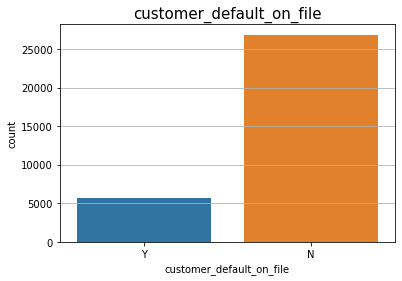

In [48]:
#countplot
df['customer_default_on_file'].hist(bins=3)
sns.countplot(df['customer_default_on_file'])
plt.title('customer_default_on_file', y=1, fontdict={'fontsize': 15})

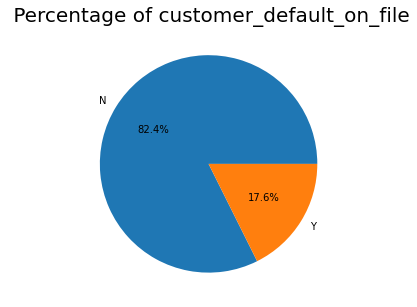

In [49]:
stat=df["customer_default_on_file"].value_counts()
plt.rcParams["figure.figsize"] = (5,5)
plt.pie(stat, labels= stat.index, autopct='%.1f%%')
plt.title(" Percentage of customer_default_on_file", y=1, fontdict={"fontsize": 20})
plt.show() 

#### From 32581 customers on file, 26,836(82.4%) of them has no defualt and 5745(17.6%) with default. this shows the historical record of the 17.6%(depend on the company policy which may be menimum or low level of risk). 

### Frequency of customer_default_on_file and Probability of Loan approval 

In [171]:
Loan_Freq = df['loan_status'].value_counts(ascending=True)
Loan_Proba = df.pivot_table(values='customer_default_on_file',index=['loan_status'],aggfunc=lambda x: x.map({'N':1,'Y':0}).mean())
print ('Frequency Table for loan_status:') 
print (Loan_Freq)

print ('\nProbility of getting loan for each customer_default_on_file class:')
print (Loan_Proba)

Frequency Table for loan_status:
1     7108
0    25473
Name: loan_status, dtype: int64

Probility of getting loan for each customer_default_on_file class:
             customer_default_on_file
loan_status                          
0                                0.86
1                                0.69


### Conclusion: Customers with no default on file has 86% and customers default on file has 69% probability for their loan request approval.   

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer_age               32581 non-null  int64  
 1   customer_income            32581 non-null  int64  
 2   customer_home_ownership    32581 non-null  object 
 3   customer_emp_length        31686 non-null  float64
 4   loan_purpose               32581 non-null  object 
 5   loan_grade                 32581 non-null  object 
 6   loan_amnt                  32581 non-null  int64  
 7   loan_int_rate              29465 non-null  float64
 8   loan_status                32581 non-null  int64  
 9   loan_percent_income        32581 non-null  float64
 10  customer_cred_hist_length  32581 non-null  int64  
 11  customer_default_on_file   32581 non-null  object 
 12  loan_cred_hist_length      32581 non-null  float64
dtypes: float64(4), int64(5), object(4)
memory usag

## Outlier Detection 


In [40]:
def outlier_detection(dftemp,var):
    sns.boxplot(x=df[var])
    mean1= df[var].mean()
    std1=df[var].std()
    Min1=mean1-3*std1
    Max1=mean1+3*std1
    print("Mean - 3 * standard deviation:",Min1,"\nMean + 3 * standard deviation:",Max1)
    if ((max(dftemp[var]) <Max1)& (min(dftemp[var])>Min1)):
        print("\nThere is no outlier in '%s' based on 'Mean and Standard Deviation Method' in the dataset that you give to this function" % var)   
    else: print("\nThere are some outliers in '%s' based on 'Mean and Standard Deviation Method' in the dataset that you give to this function" % var)   
    return dftemp[var].describe()

In [33]:
df['customer_age'].describe()

count   32408.00
mean       27.72
std         6.19
min        20.00
25%        23.00
50%        26.00
75%        30.00
max        78.00
Name: customer_age, dtype: float64

Mean - 3 * standard deviation: 9.169623322166576 
Mean + 3 * standard deviation: 46.28032730730763

There are some outliers in 'customer_age' based on 'Mean and Standard Deviation Method' in the dataset that you give to this function


count   32408.00
mean       27.72
std         6.19
min        20.00
25%        23.00
50%        26.00
75%        30.00
max        78.00
Name: customer_age, dtype: float64

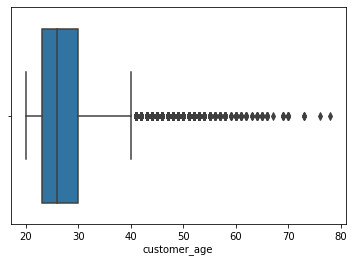

In [41]:
outlier_detection(df,'customer_age')

In [35]:
df['customer_income'].describe()

count     32408.00
mean      65898.41
std       52522.60
min        4000.00
25%       38500.00
50%       55000.00
75%       79200.00
max     2039784.00
Name: customer_income, dtype: float64

Mean - 3 * standard deviation: -91669.39606580757 
Mean + 3 * standard deviation: 223466.22555235412

There are some outliers in 'customer_income' based on 'Mean and Standard Deviation Method' in the dataset that you give to this function


count     32408.00
mean      65898.41
std       52522.60
min        4000.00
25%       38500.00
50%       55000.00
75%       79200.00
max     2039784.00
Name: customer_income, dtype: float64

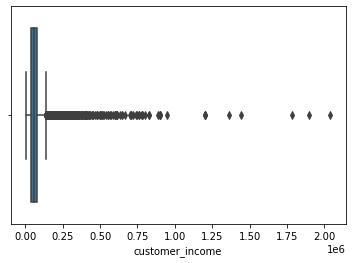

In [42]:
outlier_detection(df,'customer_income')

In [37]:
df['customer_emp_length'].describe()

count   32408.00
mean        4.79
std         4.09
min         0.00
25%         2.00
50%         4.00
75%         7.00
max       123.00
Name: customer_emp_length, dtype: float64

Mean - 3 * standard deviation: -7.475128334600589 
Mean + 3 * standard deviation: 17.05606216237461

There are some outliers in 'customer_emp_length' based on 'Mean and Standard Deviation Method' in the dataset that you give to this function


count   32408.00
mean        4.79
std         4.09
min         0.00
25%         2.00
50%         4.00
75%         7.00
max       123.00
Name: customer_emp_length, dtype: float64

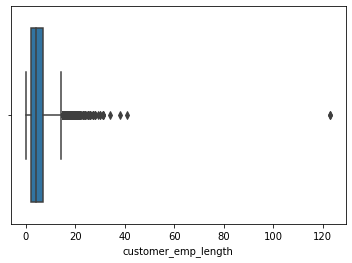

In [43]:
outlier_detection(df,'customer_emp_length')

In [39]:
df['loan_amnt'].describe()

count   32408.00
mean     9593.76
std      6322.78
min       500.00
25%      5000.00
50%      8000.00
75%     12250.00
max     35000.00
Name: loan_amnt, dtype: float64

Mean - 3 * standard deviation: -9374.577883412881 
Mean + 3 * standard deviation: 28562.09948301792

There are some outliers in 'loan_amnt' based on 'Mean and Standard Deviation Method' in the dataset that you give to this function


count   32408.00
mean     9593.76
std      6322.78
min       500.00
25%      5000.00
50%      8000.00
75%     12250.00
max     35000.00
Name: loan_amnt, dtype: float64

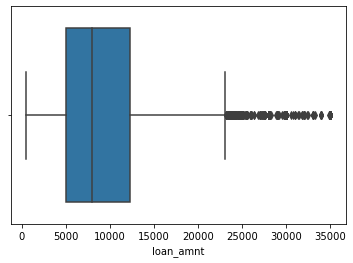

In [44]:
outlier_detection(df,'loan_amnt')

In [41]:
df['loan_int_rate'].describe()

count   32408.00
mean       11.02
std         3.08
min         5.42
25%         8.49
50%        11.01
75%        13.11
max        23.22
Name: loan_int_rate, dtype: float64

Mean - 3 * standard deviation: 1.766776611944442 
Mean + 3 * standard deviation: 20.26659615414468

There are some outliers in 'loan_int_rate' based on 'Mean and Standard Deviation Method' in the dataset that you give to this function


count   32408.00
mean       11.02
std         3.08
min         5.42
25%         8.49
50%        11.01
75%        13.11
max        23.22
Name: loan_int_rate, dtype: float64

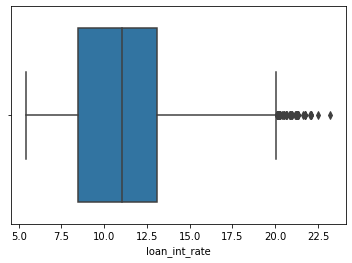

In [45]:
outlier_detection(df,'loan_int_rate')

In [43]:
df['loan_int_rate'].describe()

count   32408.00
mean       11.02
std         3.08
min         5.42
25%         8.49
50%        11.01
75%        13.11
max        23.22
Name: loan_int_rate, dtype: float64

Mean - 3 * standard deviation: 1.766776611944442 
Mean + 3 * standard deviation: 20.26659615414468

There are some outliers in 'loan_int_rate' based on 'Mean and Standard Deviation Method' in the dataset that you give to this function


count   32408.00
mean       11.02
std         3.08
min         5.42
25%         8.49
50%        11.01
75%        13.11
max        23.22
Name: loan_int_rate, dtype: float64

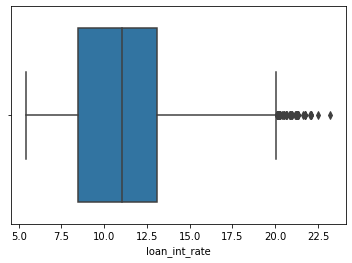

In [46]:
outlier_detection(df,'loan_int_rate')

In [45]:
df['loan_percent_income'].describe()

count   32408.00
mean        0.17
std         0.11
min         0.00
25%         0.09
50%         0.15
75%         0.23
max         0.83
Name: loan_percent_income, dtype: float64

Mean - 3 * standard deviation: -0.1501713946406547 
Mean + 3 * standard deviation: 0.4906904022930965

There are some outliers in 'loan_percent_income' based on 'Mean and Standard Deviation Method' in the dataset that you give to this function


count   32408.00
mean        0.17
std         0.11
min         0.00
25%         0.09
50%         0.15
75%         0.23
max         0.83
Name: loan_percent_income, dtype: float64

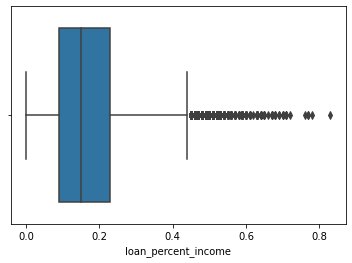

In [47]:
outlier_detection(df,'loan_percent_income')

In [47]:
df['customer_cred_hist_length'].describe()

count   32408.00
mean        5.81
std         4.05
min         2.00
25%         3.00
50%         4.00
75%         8.00
max        30.00
Name: customer_cred_hist_length, dtype: float64

Mean - 3 * standard deviation: -6.351664126897006 
Mean + 3 * standard deviation: 17.970153388807645

There are some outliers in 'customer_cred_hist_length' based on 'Mean and Standard Deviation Method' in the dataset that you give to this function


count   32408.00
mean        5.81
std         4.05
min         2.00
25%         3.00
50%         4.00
75%         8.00
max        30.00
Name: customer_cred_hist_length, dtype: float64

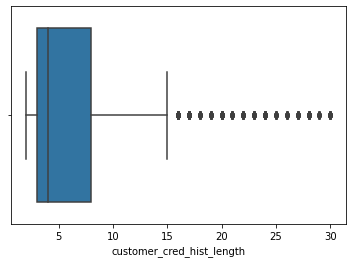

In [48]:
outlier_detection(df,'customer_cred_hist_length')

In [49]:
df['loan_ratio_cred_hist_length'].describe()

count   32408.00
mean     2395.38
std      2217.02
min        34.48
25%       866.67
50%      1675.00
75%      3166.67
max     17500.00
Name: loan_ratio_cred_hist_length, dtype: float64

Mean - 3 * standard deviation: -4255.694050382115 
Mean + 3 * standard deviation: 9046.451946457053

There are some outliers in 'loan_ratio_cred_hist_length' based on 'Mean and Standard Deviation Method' in the dataset that you give to this function


count   32408.00
mean     2395.38
std      2217.02
min        34.48
25%       866.67
50%      1675.00
75%      3166.67
max     17500.00
Name: loan_ratio_cred_hist_length, dtype: float64

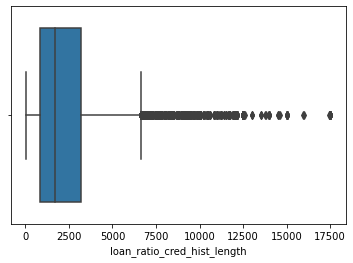

In [49]:
outlier_detection(df,'loan_ratio_cred_hist_length')

## Fixing Outliers

In [50]:
#I want to replace values bigger than upper outer fence with upper outer fence and values less than lower outer fence with
#lower outer fence
#lower outer fence: Q1 - 3*IQR
#upper outer fence: Q3 + 3*IQR
def fixing_outliers(col):#col is name of column that you want to fix its outliers
    i=0 # i is number of outliers that they are less than lower outer fence
    j=0 # j is  number of outliers that they are bigger than upper outer fence
    Q1=df[col].quantile(0.25) # finding 1st quartile(lowe quartile)
    Q3=df[col].quantile(0.75) # finding 3rd quartile(upper quartile)
    IQR=Q3-Q1 #calculationg Inter Quartile Range
    UOF1=Q3+3*(IQR)#UOF=upper outer fence
    LOF1=Q1-3*(IQR)#LOF=lower outer fence
    Clean_col=[] # Create an ematy list to append value to it
    for val in df[col]:#val is value of that column . here we select values of that column one by one and execute the loop
        if val<LOF1:   
            Clean_col.append(LOF1)# if value is less than LOF we will repalce that with LOF
            i+=1
        elif val>UOF1 :  # if value is bigger than UOF we will repalce that with UOF 
            Clean_col.append(UOF1)
            j+=1
        else : Clean_col.append(val)
    df[col]=Clean_col # update the column by assigning Clean_col
    sns.distplot(df[col])#Plotting univariate distributions
    print(f'Number of outliers that they are less than lower outer fence({LOF1}): ',i,f'\nNumber of outliers that they are bigger than upper outer fence ({UOF1}) : ',j)
    return df[col] .describe()

<AxesSubplot:xlabel='customer_age'>

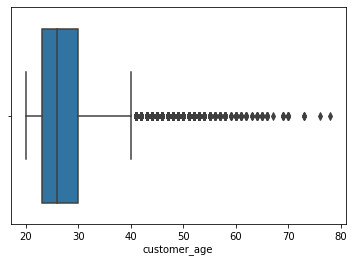

In [85]:
sns.boxplot(x=df['customer_age'])

<AxesSubplot:xlabel='customer_age', ylabel='Density'>

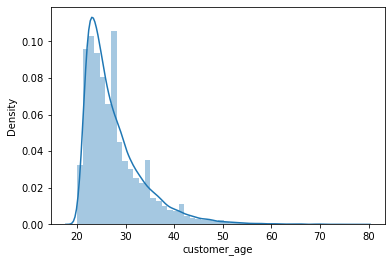

In [52]:
sns.distplot(df['customer_age'])

In [53]:
df['customer_age'].describe()

count   32408.00
mean       27.72
std         6.19
min        20.00
25%        23.00
50%        26.00
75%        30.00
max        78.00
Name: customer_age, dtype: float64

Number of outliers that they are less than lower outer fence(2.0):  0 
Number of outliers that they are bigger than upper outer fence (51.0) :  241


count   32408.00
mean       27.67
std         5.94
min        20.00
25%        23.00
50%        26.00
75%        30.00
max        51.00
Name: customer_age, dtype: float64

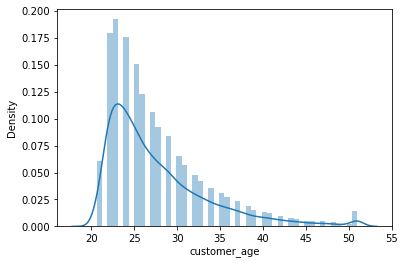

In [51]:
fixing_outliers('customer_age')

<AxesSubplot:xlabel='customer_income'>

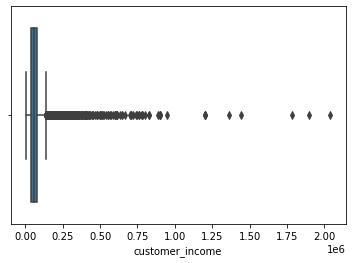

In [55]:
sns.boxplot(x=df['customer_income'])

<AxesSubplot:xlabel='customer_income', ylabel='Density'>

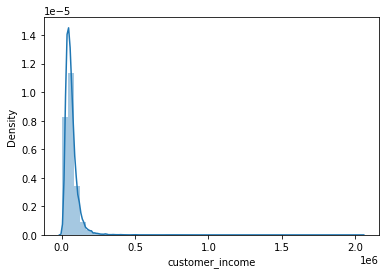

In [56]:
sns.distplot(df['customer_income'])

In [57]:
df['customer_income'].describe()

count     32408.00
mean      65898.41
std       52522.60
min        4000.00
25%       38500.00
50%       55000.00
75%       79200.00
max     2039784.00
Name: customer_income, dtype: float64

Number of outliers that they are less than lower outer fence(-83600.0):  0 
Number of outliers that they are bigger than upper outer fence (201300.0) :  429


count    32408.00
mean     64055.99
std      36643.79
min       4000.00
25%      38500.00
50%      55000.00
75%      79200.00
max     201300.00
Name: customer_income, dtype: float64

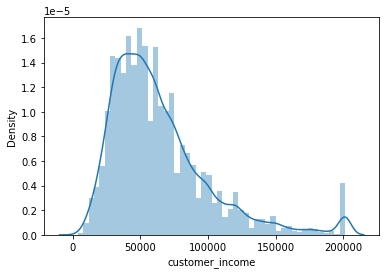

In [52]:
fixing_outliers('customer_income')

<AxesSubplot:xlabel='customer_emp_length'>

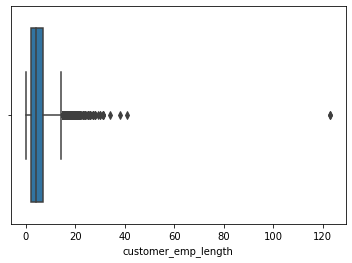

In [59]:
sns.boxplot(x=df['customer_emp_length'])

<AxesSubplot:xlabel='customer_emp_length', ylabel='Density'>

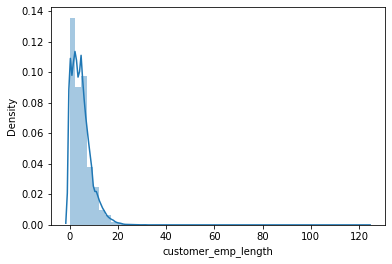

In [60]:
sns.distplot(df['customer_emp_length'])

In [61]:
df['customer_emp_length'].describe()

count   32408.00
mean        4.79
std         4.09
min         0.00
25%         2.00
50%         4.00
75%         7.00
max       123.00
Name: customer_emp_length, dtype: float64

Number of outliers that they are less than lower outer fence(-13.0):  0 
Number of outliers that they are bigger than upper outer fence (22.0) :  54


count   32408.00
mean        4.78
std         3.95
min         0.00
25%         2.00
50%         4.00
75%         7.00
max        22.00
Name: customer_emp_length, dtype: float64

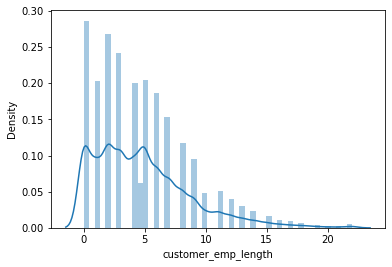

In [53]:
fixing_outliers('customer_emp_length')

<AxesSubplot:xlabel='loan_amnt'>

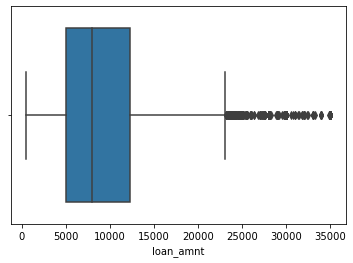

In [63]:
sns.boxplot(x=df['loan_amnt'])

Number of outliers that they are less than lower outer fence(-16750.0):  0 
Number of outliers that they are bigger than upper outer fence (34000.0) :  185


count   32408.00
mean     9588.06
std      6300.27
min       500.00
25%      5000.00
50%      8000.00
75%     12250.00
max     34000.00
Name: loan_amnt, dtype: float64

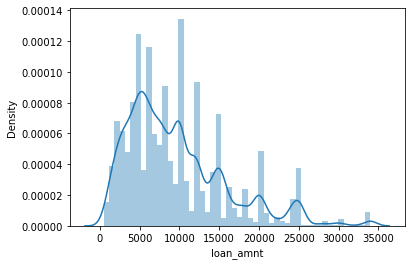

In [54]:
fixing_outliers('loan_amnt')

In [65]:
df['loan_amnt'].describe()

count   32408.00
mean     9588.06
std      6300.27
min       500.00
25%      5000.00
50%      8000.00
75%     12250.00
max     34000.00
Name: loan_amnt, dtype: float64

Number of outliers that they are less than lower outer fence(-5.369999999999997):  0 
Number of outliers that they are bigger than upper outer fence (26.97) :  0


count   32408.00
mean       11.02
std         3.08
min         5.42
25%         8.49
50%        11.01
75%        13.11
max        23.22
Name: loan_int_rate, dtype: float64

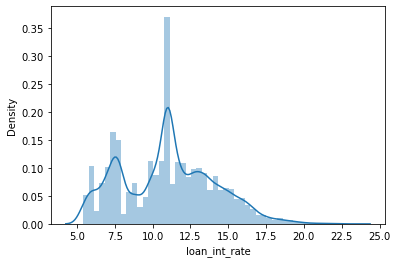

In [55]:
fixing_outliers('loan_int_rate')

<AxesSubplot:xlabel='loan_int_rate'>

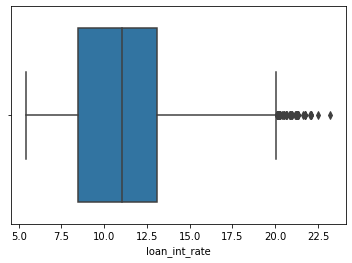

In [67]:
sns.boxplot(x=df['loan_int_rate'])

In [68]:
df['loan_int_rate'].describe()

count   32408.00
mean       11.02
std         3.08
min         5.42
25%         8.49
50%        11.01
75%        13.11
max        23.22
Name: loan_int_rate, dtype: float64

Number of outliers that they are less than lower outer fence(-5.369999999999997):  0 
Number of outliers that they are bigger than upper outer fence (26.97) :  0


count   32408.00
mean       11.02
std         3.08
min         5.42
25%         8.49
50%        11.01
75%        13.11
max        23.22
Name: loan_int_rate, dtype: float64

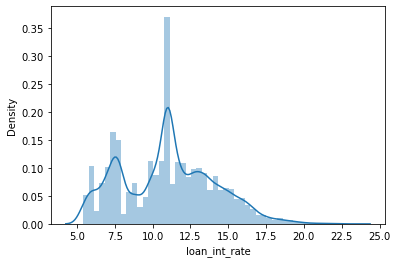

In [56]:
fixing_outliers('loan_int_rate')

<AxesSubplot:xlabel='loan_percent_income'>

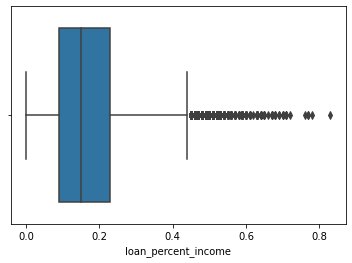

In [70]:
sns.boxplot(x=df['loan_percent_income'])

In [71]:
df['loan_percent_income'].describe()

count   32408.00
mean        0.17
std         0.11
min         0.00
25%         0.09
50%         0.15
75%         0.23
max         0.83
Name: loan_percent_income, dtype: float64

Number of outliers that they are less than lower outer fence(-0.33000000000000007):  0 
Number of outliers that they are bigger than upper outer fence (0.65) :  22


count   32408.00
mean        0.17
std         0.11
min         0.00
25%         0.09
50%         0.15
75%         0.23
max         0.65
Name: loan_percent_income, dtype: float64

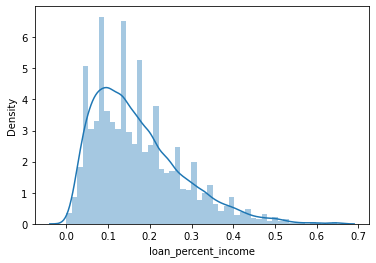

In [57]:
fixing_outliers('loan_percent_income')

<AxesSubplot:xlabel='customer_cred_hist_length'>

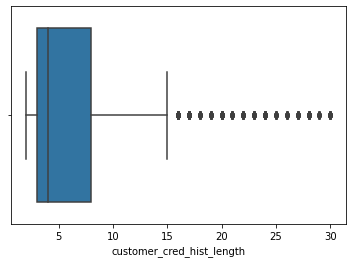

In [73]:
sns.boxplot(x=df['customer_cred_hist_length'])

In [74]:
df['customer_cred_hist_length'].describe()

count   32408.00
mean        5.81
std         4.05
min         2.00
25%         3.00
50%         4.00
75%         8.00
max        30.00
Name: customer_cred_hist_length, dtype: float64

Number of outliers that they are less than lower outer fence(-12.0):  0 
Number of outliers that they are bigger than upper outer fence (23.0) :  145


count   32408.00
mean        5.79
std         3.97
min         2.00
25%         3.00
50%         4.00
75%         8.00
max        23.00
Name: customer_cred_hist_length, dtype: float64

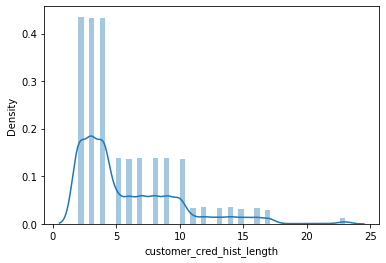

In [58]:
fixing_outliers('customer_cred_hist_length')

<AxesSubplot:xlabel='loan_ratio_cred_hist_length'>

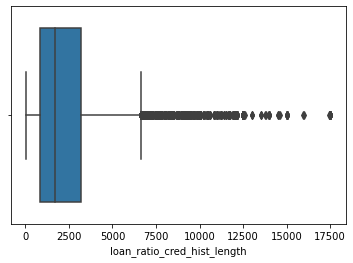

In [76]:
sns.boxplot(x=df['loan_ratio_cred_hist_length'])# It is loan to credit history ratio

In [77]:
df['loan_ratio_cred_hist_length'].describe()

count   32408.00
mean     2395.38
std      2217.02
min        34.48
25%       866.67
50%      1675.00
75%      3166.67
max     17500.00
Name: loan_ratio_cred_hist_length, dtype: float64

Number of outliers that they are less than lower outer fence(-6033.333333333333):  0 
Number of outliers that they are bigger than upper outer fence (10066.666666666666) :  372


count   32408.00
mean     2366.57
std      2089.97
min        34.48
25%       866.67
50%      1675.00
75%      3166.67
max     10066.67
Name: loan_ratio_cred_hist_length, dtype: float64

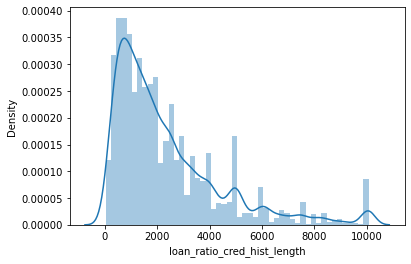

In [59]:
fixing_outliers('loan_ratio_cred_hist_length')

### Hypothesis Testing 

#### Because these two variables are categoric for test of independency we should conduct Chi_squared test

##### The Null and Alternate Hypotheses
we are interested in knowing if there is a relationship between 'customer_home_ownership' and 'loan_purpose'. In order to do so, we would have to use the Chi-squared test. But first, let's state our null hypothesis and the alternative hypothesis.

- H0: There is no statistically significant relationship between 'customer_home_ownership' and 'loan_purpose'.

- Ha:There is a statistically significant relationship between 'customer_home_ownership' and 'loan_purpose'.


## Chi-squared test of independence

In [101]:
from scipy.stats import chi2_contingency
def chi_square(c1,c2):
    chi_2, p_val, dof, exp_val = chi2_contingency(pd.crosstab(df[c1],df[c2],margins = False))# make sure margins = False
    print("Expected values: \n")
    print(exp_val)
    #print('\nChi-square is : %f'%chi_2, '\n\np_value is : %f'%p_val, '\n\ndegree of freedom is : %i'%dof)
    print(f'\nChi-square is : {chi_2}', f'\n\np_value is : {p_val}', f'\n\ndegree of freedom is :{dof}')
    if exp_val.min()<10 : print("\n********************************************\nWarning :We have some small expected \
values\n******************************************** ")
    elif p_val < 0.05:# consider significan level is 5%
        print(F"\nThere is a statistically  significant correlation between {c1} and {c2} at a 0.05 significant level")
    else:
        print(F"\nThere is no correlation between the two variables( we don't have enough evidence to conclude there is a statistically significant relationship between {c1} and {c2} at a 5% significant level).")        

### Hypothesis One:
       H0: There is no statistically significant relationship between 'customer_home_ownership' and 'loan_purpose'
       Ha:There is a statistically significant relationship between 'customer_home_ownership' and 'loan_purpose'

In [102]:
chi_square('customer_home_ownership' , 'loan_purpose') # you need only check assumption and assuptions are sutisfied 

Expected values: 

[[2140.09423599 2643.25765243 1482.26993335 2491.07134041 2266.70994816
  2342.59688966]
 [ 427.3463651   527.82093927  295.98821279  497.4314984   452.62972106
   467.78326339]
 [2621.55939891 3237.92140829 1815.74185386 3051.49716119 2776.66033078
  2869.61984695]]

Chi-square is : 729.2194519250784 

p_value is : 3.341082892593578e-150 

degree of freedom is :10

There is a statistically  significant correlation between customer_home_ownership and loan_purpose at a 0.05 significant level


In [103]:
contigency_table= pd.crosstab(df['customer_home_ownership'],df['loan_purpose'],margins = True)
contigency_table

loan_purpose,DEBTCONSOLIDATION,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE,All
customer_home_ownership,,,,,,,
MORTGAGE,2298,2607,1732,2178,2328,2223,13366
OWN,88,543,329,450,461,798,2669
RENT,2803,3259,1533,3412,2707,2659,16373
All,5189,6409,3594,6040,5496,5680,32408


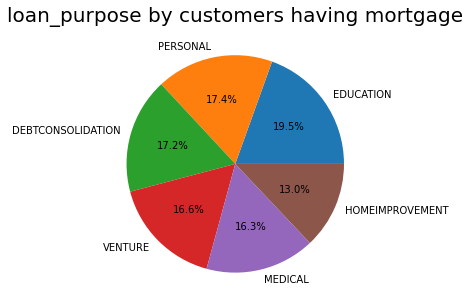

In [114]:
mortgage=df['loan_purpose'][df.customer_home_ownership=="MORTGAGE"].value_counts()
plt.rcParams["figure.figsize"] = (5,5)
plt.pie(mortgage, labels= mortgage.index, autopct='%.1f%%')
plt.title("loan_purpose by customers having mortgage", y=1, fontdict={"fontsize": 20})
plt.show()

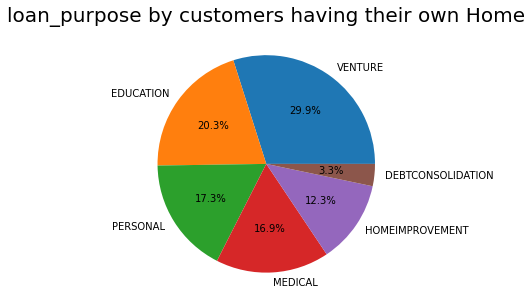

In [115]:
mortgage=df['loan_purpose'][df.customer_home_ownership=="OWN"].value_counts()
plt.rcParams["figure.figsize"] = (5,5)
plt.pie(mortgage, labels= mortgage.index, autopct='%.1f%%')
plt.title("loan_purpose by customers having their own Home", y=1, fontdict={"fontsize": 20})
plt.show()

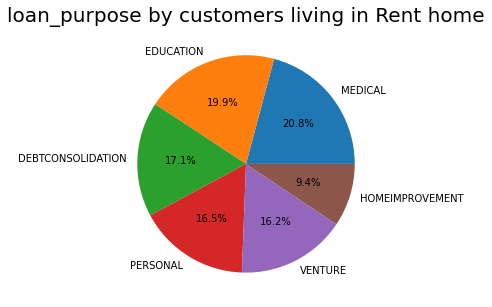

In [116]:
mortgage=df['loan_purpose'][df.customer_home_ownership=="RENT"].value_counts()
plt.rcParams["figure.figsize"] = (5,5)
plt.pie(mortgage, labels= mortgage.index, autopct='%.1f%%')
plt.title("loan_purpose by customers living in Rent home", y=1, fontdict={"fontsize": 20})
plt.show()

### Conclusion:1
There is a statistically significant correlation between customer_home_ownership and loan_purpose at a 0.05 significant level: 19.8% of customers use the loan for education, 18.6% for medial and 17.6% for business veture capital. personal 16.9%, debt consolidation 16% and 11.1 of them for home improvement purpose¶

### Hypothesis: 2
    H0: There is no statistically significant relationship between 'customer_home_ownership' and 'customer_default_on_file'  
    Ha:There is a statistically significant relationship between 'customer_home_ownership' and 'customer_default_on_file'

In [104]:
chi_square('customer_home_ownership' , 'customer_default_on_file') # you need only check assumption

Expected values: 

[[11002.78165885  2363.21834115]
 [ 2197.09892619   471.90107381]
 [13478.11941496  2894.88058504]]

Chi-square is : 132.05970563104663 

p_value is : 2.106683439620243e-29 

degree of freedom is :2

There is a statistically  significant correlation between customer_home_ownership and customer_default_on_file at a 0.05 significant level


In [112]:
contingency_table= pd.crosstab(df['customer_home_ownership'],df['customer_default_on_file'],margins = True)
contingency_table

customer_default_on_file,N,Y,All
customer_home_ownership,,,
MORTGAGE,11378,1988,13366
OWN,2199,470,2669
RENT,13101,3272,16373
All,26678,5730,32408


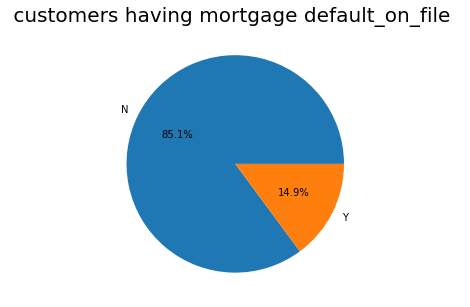

In [120]:
mortgage=df['customer_default_on_file'][df.customer_home_ownership=="MORTGAGE"].value_counts()
plt.rcParams["figure.figsize"] = (5,5)
plt.pie(mortgage, labels= mortgage.index, autopct='%.1f%%')
plt.title(" customers having mortgage default_on_file  ", y=1, fontdict={"fontsize": 20})
plt.show()

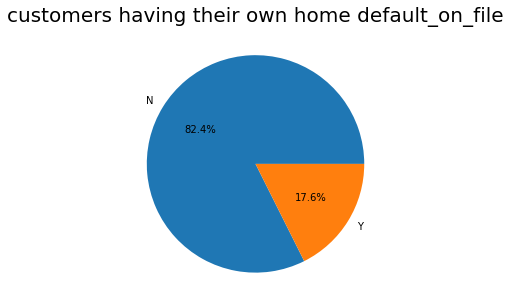

In [119]:
mortgage=df['customer_default_on_file'][df.customer_home_ownership=="OWN"].value_counts()
plt.rcParams["figure.figsize"] = (5,5)
plt.pie(mortgage, labels= mortgage.index, autopct='%.1f%%')
plt.title("customers having their own home default_on_file", y=1, fontdict={"fontsize": 20})
plt.show()

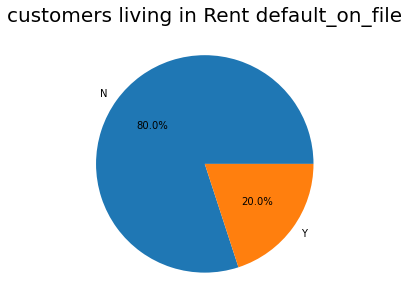

In [121]:
mortgage=df['customer_default_on_file'][df.customer_home_ownership=="RENT"].value_counts()
plt.rcParams["figure.figsize"] = (5,5)
plt.pie(mortgage, labels= mortgage.index, autopct='%.1f%%')
plt.title("customers living in Rent default_on_file", y=1, fontdict={"fontsize": 20})
plt.show()

Outliers are fixed, Based on Central limit Theorem and Normality test, it is possible to conduct the following hypothesis Test

### Hypothesis Testing Using pearson correlation 

## Hypothesis 3
                    H0: Employement lenght has strong association with loan amount requested
                    Ha: Employement lenght has no association with loan amount requested

In [68]:
df=df[["loan_amnt","customer_emp_length"]]
df.head()

,loan_amnt,customer_emp_length
0,34000.00,22.00
1,1000.00,5.00
2,5500.00,1.00
3,34000.00,4.00
4,34000.00,8.00


In [69]:
df.corr()#Pearson correlation of the two varaibles 

,loan_amnt,customer_emp_length
loan_amnt,1.00,0.11
customer_emp_length,0.11,1.00


Conclusion: There is no strong correlation between customer loan amount requested and customer employement length.


### Hypothesis Testing using Anova: Two_way Anova 

### Hypothesis 4
       Ho: There is association between loan amount, customer home ownership and customer default on file
       Ha: There is association between loan amount, customer home ownership and customer default on file

In [5]:
import pingouin as pg

In [10]:
aov = pg.anova(data=df,dv='loan_amnt', between=['customer_home_ownership', 'customer_default_on_file'], 
             detailed=True)

print(aov)

                                              Source            SS       DF  \
0                            customer_home_ownership  2.368811e+10      3.0   
1                           customer_default_on_file  2.893035e+09      1.0   
2  customer_home_ownership * customer_default_on_...  1.821959e+09      3.0   
3                                           Residual  1.274684e+12  32573.0   

             MS           F          p-unc       np2  
0  7.896036e+09  201.773617  1.128047e-129  0.018244  
1  2.893035e+09   73.927997   8.457967e-18  0.002264  
2  6.073198e+08   15.519319   4.384977e-10  0.001427  
3  3.913314e+07         NaN            NaN       NaN  


  The pvalues of the variables less than 0.05 at 5% significant level. 

## Conclusion:
There is statistiaclly association between customer_home_ownership and loan amount at 5% significant level
There is statistiaclly association between customer_home_ownership and customer_default_on_file at 5% significant level
There is statistiaclly association between customer_home_ownership  and   and customer_default_on_file at 5% significant level

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32408 entries, 0 to 32580
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   customer_age                 32408 non-null  float64
 1   customer_income              32408 non-null  float64
 2   customer_home_ownership      32408 non-null  object 
 3   customer_emp_length          32408 non-null  float64
 4   loan_purpose                 32408 non-null  object 
 5   loan_grade                   32408 non-null  object 
 6   loan_amnt                    32408 non-null  float64
 7   loan_int_rate                32408 non-null  float64
 8   loan_status                  32408 non-null  int64  
 9   loan_percent_income          32408 non-null  float64
 10  customer_cred_hist_length    32408 non-null  float64
 11  customer_default_on_file     32408 non-null  object 
 12  loan_ratio_cred_hist_length  32408 non-null  float64
dtypes: float64(8), i

## Transformation of variables using Square root and Logarism functions

In [80]:
df['customer_age'].describe()

count   32408.00
mean       27.67
std         5.94
min        20.00
25%        23.00
50%        26.00
75%        30.00
max        51.00
Name: customer_age, dtype: float64

In [60]:
df['customer_age']=np.log(df['customer_age'])

In [82]:
df['customer_age'].describe()

count   32408.00
mean        3.30
std         0.19
min         3.00
25%         3.14
50%         3.26
75%         3.40
max         3.93
Name: customer_age, dtype: float64

In [83]:
df['customer_income'].describe()

count    32408.00
mean     64055.99
std      36643.79
min       4000.00
25%      38500.00
50%      55000.00
75%      79200.00
max     201300.00
Name: customer_income, dtype: float64

In [61]:
df['customer_income']=np.log(df['customer_income'])

In [85]:
df['customer_income'].describe()

count   32408.00
mean       10.92
std         0.55
min         8.29
25%        10.56
50%        10.92
75%        11.28
max        12.21
Name: customer_income, dtype: float64

In [86]:
df['customer_emp_length'].describe()

count   32408.00
mean        4.78
std         3.95
min         0.00
25%         2.00
50%         4.00
75%         7.00
max        22.00
Name: customer_emp_length, dtype: float64

In [62]:
df['customer_emp_length']=np.sqrt(df['customer_emp_length'])

In [88]:
df['customer_emp_length'].describe()

count   32408.00
mean        1.93
std         1.03
min         0.00
25%         1.41
50%         2.00
75%         2.65
max         4.69
Name: customer_emp_length, dtype: float64

In [89]:
df['loan_amnt'].describe()

count   32408.00
mean     9588.06
std      6300.27
min       500.00
25%      5000.00
50%      8000.00
75%     12250.00
max     34000.00
Name: loan_amnt, dtype: float64

In [63]:
df['loan_amnt']=np.log(df['loan_amnt'])

In [91]:
df['loan_amnt'].describe()

count   32408.00
mean        8.94
std         0.71
min         6.21
25%         8.52
50%         8.99
75%         9.41
max        10.43
Name: loan_amnt, dtype: float64

In [92]:
df['loan_int_rate'].describe()

count   32408.00
mean       11.02
std         3.08
min         5.42
25%         8.49
50%        11.01
75%        13.11
max        23.22
Name: loan_int_rate, dtype: float64

In [64]:
df['loan_int_rate']=np.log(df['loan_int_rate'])

In [94]:
df['loan_int_rate'].describe()

count   32408.00
mean        2.36
std         0.29
min         1.69
25%         2.14
50%         2.40
75%         2.57
max         3.15
Name: loan_int_rate, dtype: float64

In [95]:
df['loan_percent_income'].describe()

count   32408.00
mean        0.17
std         0.11
min         0.00
25%         0.09
50%         0.15
75%         0.23
max         0.65
Name: loan_percent_income, dtype: float64

In [65]:
df[' loan_percent_income']=np.sqrt(df['loan_percent_income'])

In [97]:
df[' loan_percent_income'].describe()

count   32408.00
mean        0.39
std         0.13
min         0.00
25%         0.30
50%         0.39
75%         0.48
max         0.81
Name:  loan_percent_income, dtype: float64

In [98]:
df['customer_cred_hist_length'].describe()

count   32408.00
mean        5.79
std         3.97
min         2.00
25%         3.00
50%         4.00
75%         8.00
max        23.00
Name: customer_cred_hist_length, dtype: float64

In [66]:
df['customer_cred_hist_length']=np.log(df['customer_cred_hist_length'])

In [100]:
df['customer_cred_hist_length'].describe()

count   32408.00
mean        1.55
std         0.63
min         0.69
25%         1.10
50%         1.39
75%         2.08
max         3.14
Name: customer_cred_hist_length, dtype: float64

In [102]:
df['loan_ratio_cred_hist_length'].describe()

count   32408.00
mean     2366.57
std      2089.97
min        34.48
25%       866.67
50%      1675.00
75%      3166.67
max     10066.67
Name: loan_ratio_cred_hist_length, dtype: float64

In [67]:
df['loan_ratio_cred_hist_length']=np.log(df['loan_ratio_cred_hist_length'])

In [104]:
df['loan_ratio_cred_hist_length'].describe()

count   32408.00
mean        7.39
std         0.93
min         3.54
25%         6.76
50%         7.42
75%         8.06
max         9.22
Name: loan_ratio_cred_hist_length, dtype: float64

## One_Hot_Encoding for Categorical variables 

In [68]:
#One Hot enCoding method:
pd.get_dummies(df,drop_first=True).head() # categorical variables converted in to numeric values and numeric values converted by log and exp functions 
                                           # to bring values close to zero and one to ease the machine learning algorism prediction simpler

,customer_age,customer_income,customer_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,customer_cred_hist_length,loan_ratio_cred_hist_length,loan_percent_income,...,loan_purpose_EDUCATION,loan_purpose_HOMEIMPROVEMENT,loan_purpose_MEDICAL,loan_purpose_PERSONAL,loan_purpose_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,customer_default_on_file_Y
0,3.09,10.99,4.69,10.43,2.77,1,0.59,1.10,9.22,0.77,...,0,0,0,1,0,0,0,1,0,1
1,3.04,9.17,2.24,6.91,2.41,0,0.10,0.69,6.21,0.32,...,1,0,0,0,0,1,0,0,0,0
2,3.22,9.17,1.00,8.61,2.55,1,0.57,1.10,7.51,0.75,...,0,0,1,0,0,0,1,0,0,0
3,3.14,11.09,2.00,10.43,2.72,1,0.53,0.69,9.22,0.73,...,0,0,1,0,0,0,1,0,0,0
4,3.18,10.90,2.83,10.43,2.66,1,0.55,1.39,9.08,0.74,...,0,0,1,0,0,0,1,0,0,1


In [69]:
df= pd.get_dummies(df, drop_first=True)

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32408 entries, 0 to 32580
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_age                  32408 non-null  float64
 1   customer_income               32408 non-null  float64
 2   customer_emp_length           32408 non-null  float64
 3   loan_amnt                     32408 non-null  float64
 4   loan_int_rate                 32408 non-null  float64
 5   loan_status                   32408 non-null  int64  
 6   loan_percent_income           32408 non-null  float64
 7   customer_cred_hist_length     32408 non-null  float64
 8   loan_ratio_cred_hist_length   32408 non-null  float64
 9    loan_percent_income          32408 non-null  float64
 10  customer_home_ownership_OWN   32408 non-null  uint8  
 11  customer_home_ownership_RENT  32408 non-null  uint8  
 12  loan_purpose_EDUCATION        32408 non-null  uint8  
 13  l

In [125]:
# Getting the summary of Data (Part # 2 after converting variables into numeric )
pd.options.display.float_format = "{:.2f}".format
df.describe() 

,customer_age,customer_income,customer_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,customer_cred_hist_length,loan_ratio_cred_hist_length,loan_percent_income,...,loan_purpose_EDUCATION,loan_purpose_HOMEIMPROVEMENT,loan_purpose_MEDICAL,loan_purpose_PERSONAL,loan_purpose_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,customer_default_on_file_Y
count,32408.00,32408.00,32408.00,32408.00,32408.00,32408.00,32408.00,32408.00,32408.00,32408.00,...,32408.00,32408.00,32408.00,32408.00,32408.00,32408.00,32408.00,32408.00,32408.00,32408.00
mean,3.30,10.92,1.93,8.94,2.36,0.22,0.17,1.55,7.39,0.39,...,0.20,0.11,0.19,0.17,0.18,0.32,0.20,0.11,0.04,0.18
std,0.19,0.55,1.03,0.71,0.29,0.41,0.11,0.63,0.93,0.13,...,0.40,0.31,0.39,0.38,0.38,0.47,0.40,0.32,0.19,0.38
min,3.00,8.29,0.00,6.21,1.69,0.00,0.00,0.69,3.54,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,3.14,10.56,1.41,8.52,2.14,0.00,0.09,1.10,6.76,0.30,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,3.26,10.92,2.00,8.99,2.40,0.00,0.15,1.39,7.42,0.39,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,3.40,11.28,2.65,9.41,2.57,0.00,0.23,2.08,8.06,0.48,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
max,3.93,12.21,4.69,10.43,3.15,1.00,0.65,3.14,9.22,0.81,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


 Correlation Among features after converting categorical values into numeric values 

<AxesSubplot:>

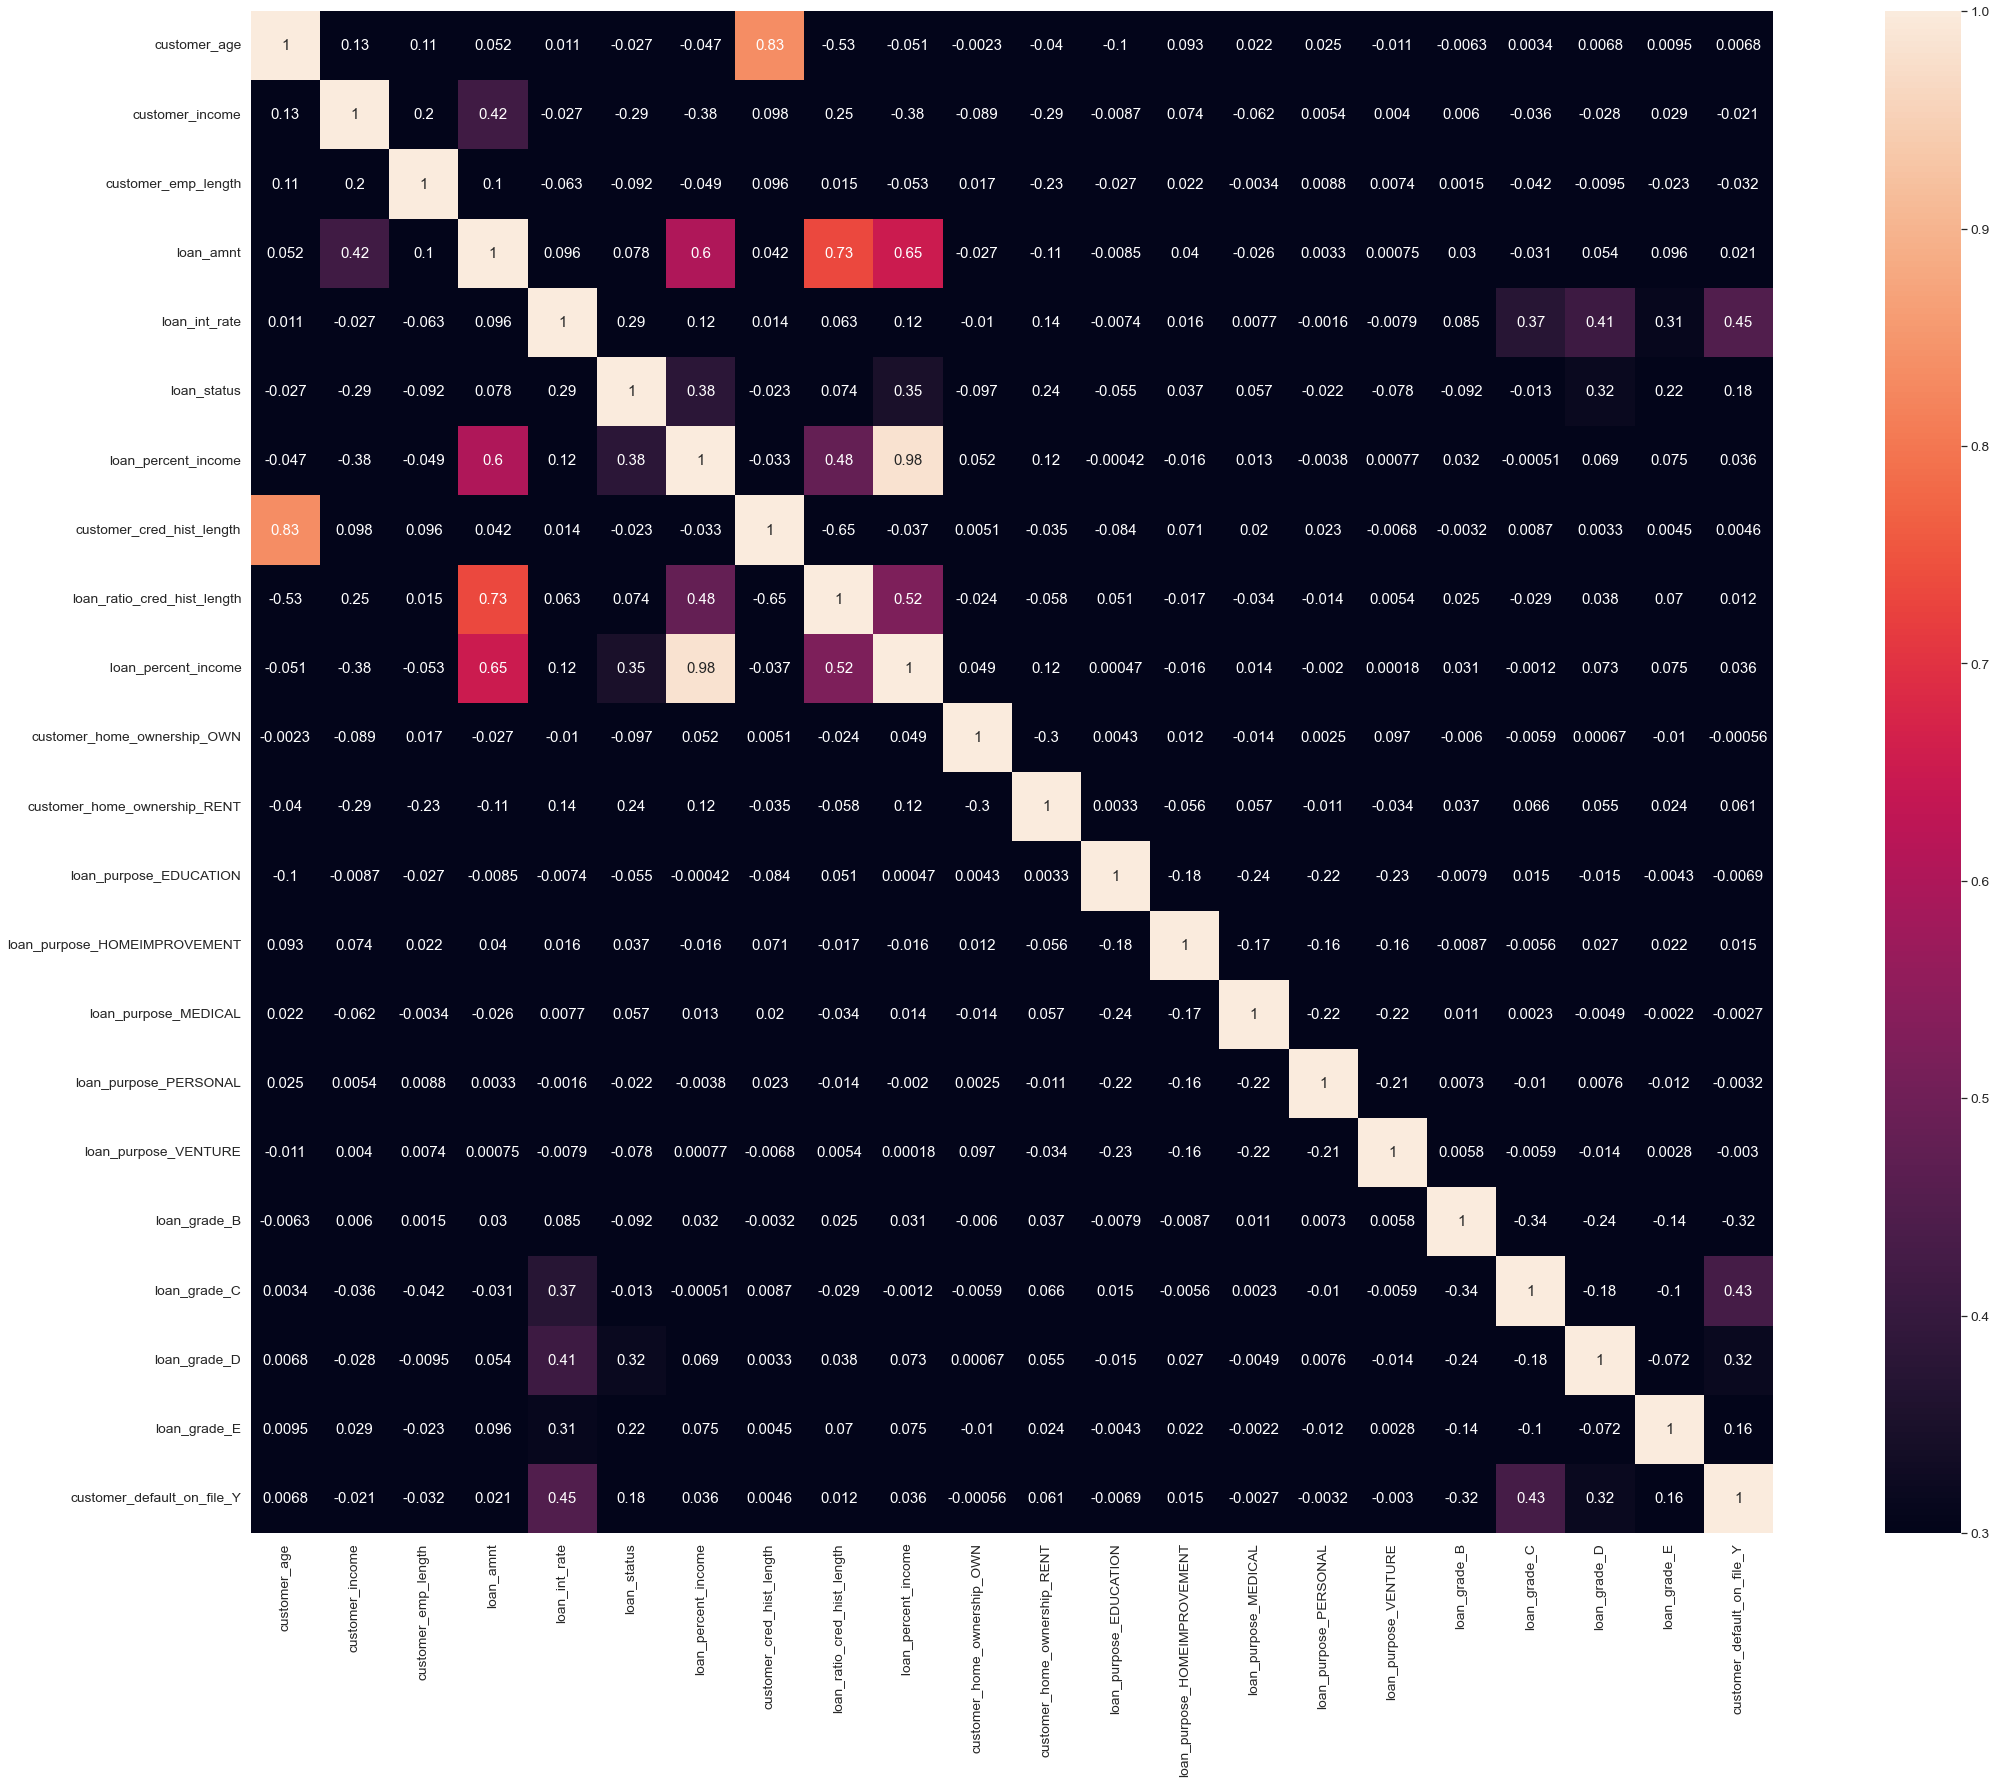

In [137]:
corr=df.corr()
f, ax = plt.subplots(figsize=(40,28))
sns.heatmap(corr,vmax=1, vmin=0.3, square=True, annot=True) 

'loan_status' correlation matrix(zoomed heatmap style)

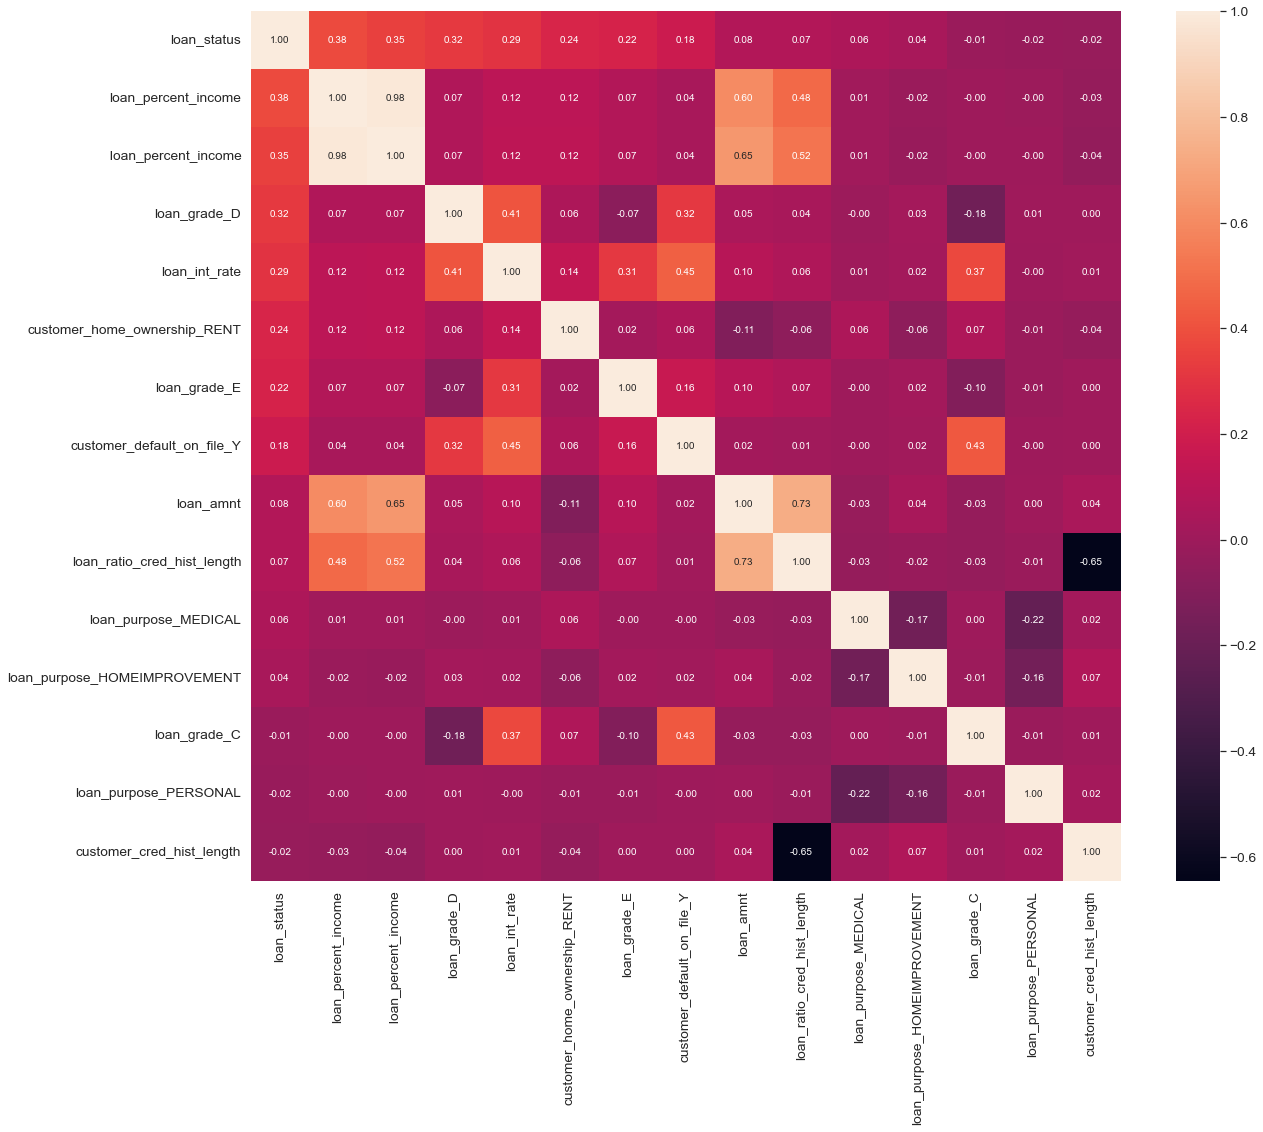

In [135]:
k = 15 #number of variables for heatmap
cols = corr.nlargest(k, 'loan_status')['loan_status'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(20, 16))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', 
    annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)

Colliniarity check: Any features with correlations greater than threshold considered has to be removed, but If I just assume that the threshol is for example 0.8, there is only one feature with correlation value 0.83 
and I don't remove this feature because important for further explanation of the findings

In [136]:
# Find all correlations between Features and Target and sort 
cor = df.corr()['loan_status'].sort_values(ascending=False)

# Print the correlations
print(cor)

loan_status                     1.00
loan_percent_income             0.38
 loan_percent_income            0.35
loan_grade_D                    0.32
loan_int_rate                   0.29
customer_home_ownership_RENT    0.24
loan_grade_E                    0.22
customer_default_on_file_Y      0.18
loan_amnt                       0.08
loan_ratio_cred_hist_length     0.07
loan_purpose_MEDICAL            0.06
loan_purpose_HOMEIMPROVEMENT    0.04
loan_grade_C                   -0.01
loan_purpose_PERSONAL          -0.02
customer_cred_hist_length      -0.02
customer_age                   -0.03
loan_purpose_EDUCATION         -0.06
loan_purpose_VENTURE           -0.08
customer_emp_length            -0.09
loan_grade_B                   -0.09
customer_home_ownership_OWN    -0.10
customer_income                -0.29
Name: loan_status, dtype: float64


In [ ]:
df_original=df.copy()

In [139]:
df_original.to_csv('Not_scaled_credit_risk_dataset -1.csv') 

In [4]:
df=pd.read_csv("Not_scaled_credit_risk_dataset -1.csv")

## Scaling the data and Set the dependent and independent features

In [135]:
# if you get dataframe that contains X, y
X=df.drop('loan_status',axis=1)
y=df['loan_status']

In [12]:
y.shape

(32408,)

## Split into training and data test set for cross-validation 

In [72]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.20)#default train_size=0.8
X_test.head()

,customer_age,customer_income,customer_emp_length,loan_amnt,loan_int_rate,loan_percent_income,customer_cred_hist_length,loan_ratio_cred_hist_length,loan_percent_income,customer_home_ownership_OWN,...,loan_purpose_EDUCATION,loan_purpose_HOMEIMPROVEMENT,loan_purpose_MEDICAL,loan_purpose_PERSONAL,loan_purpose_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,customer_default_on_file_Y
26032,3.37,11.46,2.00,7.78,2.62,0.03,2.20,5.59,0.17,0,...,0,0,0,0,0,0,1,0,0,0
30847,3.66,11.11,2.00,9.62,2.34,0.22,2.71,6.91,0.47,0,...,0,1,0,0,0,1,0,0,0,0
18119,3.56,12.07,0.00,9.68,2.44,0.09,2.30,7.38,0.30,0,...,0,0,0,0,0,1,0,0,0,0
24152,3.40,10.65,1.41,9.21,2.40,0.24,1.95,7.26,0.49,0,...,0,0,1,0,0,0,0,0,0,0
7178,3.18,11.28,1.73,8.85,2.53,0.09,1.10,7.76,0.30,0,...,0,0,0,1,0,0,1,0,0,0


In [73]:
#splitting test and training sets for modeling
#from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X, y,test_size=0.2, random_state=0)

In [22]:
y_train.value_counts() # 0 =loan approved and 1 loan not approved 

0    20272
1     5654
Name: loan_status, dtype: int64

### Build Classification Models

### Import Modules

In [144]:
#!pip install xgboost

  Using cached xgboost-1.6.1-py3-none-win_amd64.whl (125.4 MB)


In [74]:
from sklearn.metrics import roc_curve, roc_auc_score
#import classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier 
# Instantiate the classfiers and make a list
# Instantiate the classfiers and make a list
classifiers = [LogisticRegression(class_weight='balanced',random_state=1234), 
               GaussianNB(), 
               KNeighborsClassifier(), 
               SVC(class_weight='balanced',probability=True,random_state=1234),
               DecisionTreeClassifier(class_weight='balanced',random_state=1234),
               RandomForestClassifier(class_weight='balanced',random_state=1234),
               XGBClassifier(class_weight='balanced',random_state=1234),
               AdaBoostClassifier(random_state=1234) 
              ]
# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])
# Train the models and predict the probabilities on the Evaluation set. After predicting the probabilities, we’ll calculate the False positive rates, True positive rate, and AUC scores.
for cls in classifiers:
    model = cls.fit(X_train,y_train)
    yproba = model.predict_proba(X_test)[::,1]
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

[01:21:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




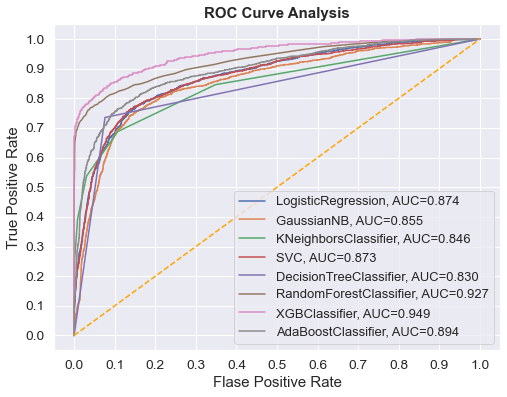

In [146]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

#  Logistic Regression 

In [76]:
#scale the features using training set
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = pd.DataFrame(sc.fit_transform(X_train),columns=X.columns)
X_test_scaled = pd.DataFrame(sc.transform(X_test),columns=X.columns)

In [77]:
#1 import classifier
from sklearn.linear_model import LogisticRegression

#2 create an instanse
LR = LogisticRegression()

#3 train model
LR.fit(X_train,y_train)

#4 predict on test set
y_pred = LR.predict(X_test)
y_pred_probs = LR.predict_proba(X_test)

In [78]:
from sklearn.metrics import confusion_matrix, classification_report

### Model evaluation

In [79]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score, recall_score, classification_report,f1_score

In [80]:
print('accuracy_score =')
accuracy_score(y_test,y_pred)

accuracy_score =


0.8640851589015736

In [81]:
'''
        Predicted
          0   1
Actual  0 TN  FP
        1 FN  TP

'''
print('confusion_matrix =')
confusion_matrix(y_test,y_pred)

confusion_matrix =


array([[4802,  245],
       [ 636,  799]], dtype=int64)

In [157]:
#step5: Evalute the model 
print(classification_report(y_test,y_pred)) # Logestic R
confusion_matrix(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.88      0.95      0.92      5047
           1       0.76      0.56      0.64      1435

    accuracy                           0.86      6482
   macro avg       0.82      0.75      0.78      6482
weighted avg       0.86      0.86      0.86      6482



array([[4797,  250],
       [ 637,  798]], dtype=int64)

Our model has 86% overall accuracy. f1-score shows that the model not perfectly 
classifies each observation into the correct class for both majority and minority. 

As you can see since this data is imbalaced data the algorithm find the best acuracy when it predicted TRUE for all 
records and means this model is not able to distingueshed between positive and nagative class 

## K-FOLD CROSSVALIDATION

In [25]:
"""K-FOLD CROSSVALIDATION"""
from sklearn.model_selection import cross_val_score
clf = LogisticRegression()
cross_val_score(clf,X,y,cv=5)

array([0.86115396, 0.86994755, 0.85668004, 0.86437278, 0.85681222])

In [159]:
cross_val_score(clf,X,y,cv=5).mean()

0.8613304996481539

In [160]:
LR = LogisticRegression()
scores=cross_val_score(LR,X,y,cv=5)
LR_score=scores.mean()
LR_score

0.8613304996481539

In [161]:
LR = LogisticRegression()
scores=cross_val_score(LR,X,y,cv=5,scoring='f1')
LR_f1score=scores.mean()
LR_f1score

0.6262258599376548

The model has imbalance data and the prediction 86% is good but not perfectly predicted and handling the imbalanced data by other machine learning algorism 

## Handeling imbalanced classes 

While in every machine learning problem, it’s a good rule of thumb to try a variety of algorithms, it can be especially beneficial with imbalanced datasets.

### Decision trees frequently perform well on imbalanced data. In modern machine learning, tree ensembles (Random Forests, Gradient Boosted Trees, etc.) almost always outperform singular decision trees

## Method1: Down-sample Majority Class method

Down-sampling involves randomly removing observations from the majority class to prevent its signal from dominating the learning algorithm.

In [16]:
df['loan_status'].value_counts()

0    25319
1     7089
Name: loan_status, dtype: int64

In [17]:
n1=df['loan_status'].value_counts()[1]
n1

7089

In [18]:
# Separate majority and minority classes
df_majority = df[df['loan_status']==0]
df_minority = df[df['loan_status']==1]

In [19]:
from sklearn.utils import resample
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=n1,     # to match minority class
                                 random_state=0) # reproducible results

In [20]:
# Combine majority class with upsampled minority class
dfb = pd.concat([df_majority_downsampled, df_minority])

In [21]:
dfb['loan_status'].value_counts()

0    7089
1    7089
Name: loan_status, dtype: int64

In [22]:
Xb=dfb.drop('loan_status',axis=1)

yb=dfb['loan_status']

In [23]:
#splitting test and training sets
from sklearn.model_selection import train_test_split
Xb_train, Xb_test, yb_train,yb_test = train_test_split(Xb, yb, random_state=0)

In [ ]:
#! pip install tensorflow

In [ ]:
#!pip install imblearn

In [30]:
from imblearn.over_sampling import SMOTE
sm  = SMOTE(random_state=1234)
Xb2, yb2 = sm.fit_sample(X, y)
Xb2_train, Xb2_test, yb2_train, yb2_test = train_test_split(Xb2, yb2, test_size= 0.2, random_state=7)

AttributeError: 'SMOTE' object has no attribute 'fit_sample'

## KNN  Classification 

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:

model3 = KNeighborsClassifier()

model3.fit(X_train,y_train)

y_pred3 = model3.predict(X_test)

In [34]:
accuracy_score(y_test,y_pred3)

0.7771509167842031

In [35]:
print(classification_report(y_test,y_pred3)) #KNN

              precision    recall  f1-score   support

           0       0.76      0.79      0.78      1742
           1       0.79      0.77      0.78      1803

    accuracy                           0.78      3545
   macro avg       0.78      0.78      0.78      3545
weighted avg       0.78      0.78      0.78      3545



In [37]:
scores = []
for i in range(1,20):# range(1,20)
    clf3 = KNeighborsClassifier(n_neighbors=i)
    scores.append(cross_val_score(clf3,X,y,cv=5).mean())

Text(0.5, 1.0, 'Finding optimal K')

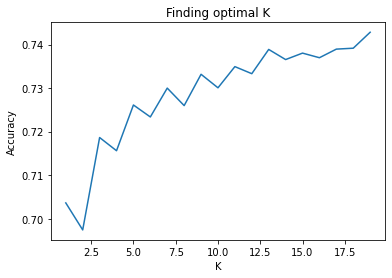

In [38]:
plt.plot(range(1,20),scores)
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.title("Finding optimal K")

In [39]:
max(scores)

0.742836695248543

In [40]:
scores

[0.7036217640166864,
 0.6974154919241895,
 0.718645233990791,
 0.7156120725467222,
 0.7261211981005117,
 0.7233703728579141,
 0.7300005721350338,
 0.7259797066191048,
 0.7331745285482943,
 0.7300705218617771,
 0.7349375004664144,
 0.7333152986420499,
 0.7388875704907675,
 0.7365599510451414,
 0.7380413579003141,
 0.736982758835133,
 0.7389577440964371,
 0.7391692101800236,
 0.742836695248543]

There is diference between them so you can select 19th. since this data is imbalnced you should better to choose k based on f_measure

In [44]:
scores = []
for i in range(1,10):# you should try range(1,20), working on 1-10 to save time  
    clf3 = KNeighborsClassifier(n_neighbors=i)
    scores.append(cross_val_score(clf3,X,y,cv=5,scoring='f1').mean())

Text(0.5, 1.0, 'Finding optimal K')

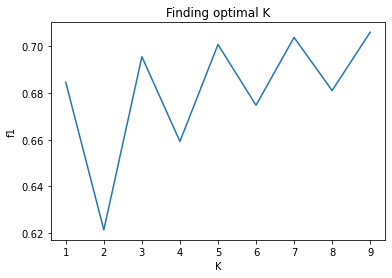

In [45]:
plt.plot(range(1,10),scores)
plt.xlabel("K")
plt.ylabel("f1")
plt.title("Finding optimal K")

In [46]:
scores

[0.684510413707005,
 0.6213969083036823,
 0.6954873987454845,
 0.6592547932738766,
 0.7006943565218732,
 0.6747182860029126,
 0.7037398046419024,
 0.6810067324983123,
 0.7059467905844725]

In [47]:
model3 = KNeighborsClassifier(n_neighbors=5)

model3.fit(X_train,y_train)

y_pred3 = model3.predict(X_test)

### Model evaluation

In [48]:
accuracy_score(y_train,model3.predict(X_train))

0.8557321546129972

In [49]:
accuracy_score(y_test,y_pred3)

0.7771509167842031

In [50]:
print('confusion_matrix =')
confusion_matrix(y_test,y_pred3)

confusion_matrix =


array([[1375,  367],
       [ 423, 1380]], dtype=int64)

In [51]:
print(classification_report(y_test,y_pred3)) # KNN

              precision    recall  f1-score   support

           0       0.76      0.79      0.78      1742
           1       0.79      0.77      0.78      1803

    accuracy                           0.78      3545
   macro avg       0.78      0.78      0.78      3545
weighted avg       0.78      0.78      0.78      3545



## Tuning

### Hyperparameter Tuning with Grid Search and Cross Validation

In [52]:
from sklearn.model_selection import GridSearchCV

In [53]:
param= {'n_neighbors':(5,6,7),'weights':['uniform','distance']} # we have 3*2=6 combinition 

In [54]:
param= {'n_neighbors':(5,6,7)} #since it takes time for these 6 combinition I just check these 3 values for k

## For not balanced data

In [55]:
KNN =KNeighborsClassifier()
model=GridSearchCV(KNN,param,cv=5,scoring='f1')
model.fit(X1,y1)
model.best_params_

{'n_neighbors': 7}

In [56]:
KNN = model.best_estimator_
scores=cross_val_score(KNN,X1,y1,cv=5)
KNN_score=scores.mean()
KNN_score

0.7300005721350338

In [57]:
KNN = model.best_estimator_
scores=cross_val_score(KNN,X1,y1,cv=5,scoring='f1')
KNN_f1score=scores.mean()
KNN_f1score

0.7037398046419024

# """ Perceptron """

In [58]:
from sklearn.linear_model import Perceptron
model5 = Perceptron()#default max_iter=1000 ,eta0=1.0

model5.fit(X_train,y_train)

y_pred5 = model5.predict(X_test)

### Model evaluation

In [59]:
accuracy_score(y_test,y_pred5)

0.7720733427362483

In [60]:
model5.coef_

array([[ 110.21674181,  -89.68798863,  -24.25868166,  -14.75666435,
         180.24191995,  343.69      ,  -21.71160981,   -3.80980302,
         251.51682173, -127.        ,   59.        ,  -49.        ,
          38.        ,   12.        ,  -30.        ,  -83.        ,
         -27.        ,  -19.        ,  145.        ,  193.        ,
          27.        ]])

In [61]:
model5.intercept_

array([123.])

In [62]:
confusion_matrix(y_test,y_pred5)

array([[1587,  155],
       [ 653, 1150]], dtype=int64)

In [63]:
print(classification_report(y_test,y_pred5))

              precision    recall  f1-score   support

           0       0.71      0.91      0.80      1742
           1       0.88      0.64      0.74      1803

    accuracy                           0.77      3545
   macro avg       0.79      0.77      0.77      3545
weighted avg       0.80      0.77      0.77      3545



### "Tunning"

### For not balanced data

In [64]:
perc = Perceptron()
param= {"eta0":[1.0,0.1,0.01]}
model=GridSearchCV(perc,param,cv=5,scoring='f1')
model.fit(X1_train,y1_train)
model.best_params_

{'eta0': 1.0}

In [65]:
"""K-FOLD CROSSVALIDATION for not balanced data"""
PERC=  Perceptron()#default max_iter=1000 ,eta0=1.0
scores=cross_val_score( PERC,X1,y1,cv=5)
PERC_score=scores.mean()
PERC_score

0.6244939465625878

In [66]:
PERC=  Perceptron()#default max_iter=1000 ,eta0=1.0
scores=cross_val_score( PERC,X1,y1,cv=5,scoring='f1')
PERC_f1score=scores.mean()
PERC_f1score

0.4026944106432341

# """ SGD (Stochastic Gradient Descent)"""

In [67]:
from sklearn.linear_model import SGDClassifier

In [68]:
sgd= SGDClassifier(loss='log',learning_rate='constant',eta0=0.25 )#This estimator implements regularized linear models with stochastic
#gradient descent (SGD) learning

#loss Defaults to 'hinge', which gives a linear SVM.
#The 'log' loss gives logistic regression , a probabilistic classifier
#'modified_huber' is another smooth loss that brings tolerance to outliers as well as probability estimates.
# 'squared_hinge' is like hinge but is quadratically penalized.
#perceptron' is the linear loss used by the perceptron algorithm.

sgd.fit(X_train,y_train)
y_pred4 = sgd.predict(X_test)

In [69]:
accuracy_score(y_test,y_pred4)

0.5235543018335684

In [208]:
cm4 = confusion_matrix(y_test,y_pred4)
cm4

array([[1741,    1],
       [1688,  115]], dtype=int64)

In [209]:
print(classification_report(y_test,y_pred4)) # SGD

              precision    recall  f1-score   support

           0       0.51      1.00      0.67      1742
           1       0.99      0.06      0.12      1803

    accuracy                           0.52      3545
   macro avg       0.75      0.53      0.40      3545
weighted avg       0.75      0.52      0.39      3545



# """Tuning"""

### For not balanced data

In [72]:
param_grid={'loss':['hinge', 'log', 'modified_huber', 'squared_hinge'],'eta0':[.001,.01,.1],'alpha':[0.01,0.001,0.0001,0.00001],'learning_rate':['constant','optimal','invscaling']}

sgd2 = SGDClassifier()
grid=GridSearchCV(sgd2,param_grid,cv=5,scoring='f1')

grid.fit(X1_train,y1_train)

grid.best_params_

{'alpha': 0.001,
 'eta0': 0.1,
 'learning_rate': 'invscaling',
 'loss': 'modified_huber'}

In [73]:
"""K-FOLD CROSSVALIDATION for not balanced data,"""
SGD =grid.best_estimator_
scores=cross_val_score(SGD,X1,y1,cv=5)
SGD_score=scores.mean()
SGD_score

0.7729557242110132

In [74]:
SGD =grid.best_estimator_
scores=cross_val_score(SGD,X1,y1,cv=5,scoring='f1')
SGD_f1score=scores.mean()
SGD_f1score

0.7523702074913683

# SVM

In [75]:
from sklearn.svm import SVC

In [76]:
##########################################################
import time
#get the start time
st=time.time() #get current time and store it in st
##########################################################
# kernel= 'linear', 'poly', 'rbf', 'sigmoid'
SV = SVC(kernel='poly')
scores = cross_val_score(SV, X, y, cv=5)
scores.mean()



##########################################################
#get the execution time
et=time.time()
execution_time1=et-st
print("execution time:",execution_time1)

execution time: 13.859907627105713


In [78]:
svc = SVC(kernel='poly')
svc.fit(X_train,y_train)

y_pred6 =svc.predict(X_test)

In [79]:
accuracy_score(y_test,y_pred6)

0.8076163610719324

In [80]:
cm6 = confusion_matrix(y_test,y_pred6)
cm6

array([[1413,  329],
       [ 353, 1450]], dtype=int64)

In [81]:
print(classification_report(y_test,y_pred6)) #SVM

              precision    recall  f1-score   support

           0       0.80      0.81      0.81      1742
           1       0.82      0.80      0.81      1803

    accuracy                           0.81      3545
   macro avg       0.81      0.81      0.81      3545
weighted avg       0.81      0.81      0.81      3545



## Tunning

In [82]:
param_grid={'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

### For not balanced data

In [83]:
"""K-FOLD CROSSVALIDATION for class_weight='balanced'"""
#SV=model.best_estimator_
SV = SVC(kernel='rbf')
scores=cross_val_score(SV,X1,y1,cv=5)
SVM_WB_score=scores.mean()
SVM_WB_score

0.7766215426253037

In [84]:
#SV=model.best_estimator_
SV = SVC(kernel='rbf')
scores=cross_val_score(SV,X1,y1,cv=5,scoring='f1')
SVM_WB_f1score=scores.mean()
SVM_WB_f1score

0.7672176048466544

# """Naive Bayes"""

In [85]:
from sklearn.naive_bayes import GaussianNB # step1

In [86]:
GNB = GaussianNB() # step 2
GNB.fit(X_train, y_train) # step 3
y_pred10 = GNB.predict(X_test) # step 4

### Model evaluation

In [87]:
GNB.score(X_test,y_test)

0.7935119887165021

In [88]:
accuracy_score(y_test,y_pred10)

0.7935119887165021

In [89]:
confusion_matrix(y_test,y_pred10)

array([[1456,  286],
       [ 446, 1357]], dtype=int64)

In [90]:
print(classification_report(y_test,y_pred10)) # Naive Bayes

              precision    recall  f1-score   support

           0       0.77      0.84      0.80      1742
           1       0.83      0.75      0.79      1803

    accuracy                           0.79      3545
   macro avg       0.80      0.79      0.79      3545
weighted avg       0.80      0.79      0.79      3545



### For not balanced data

In [91]:
"""K-FOLD CROSSVALIDATION for not balanced data"""
GNB=GaussianNB()
scores=cross_val_score(GNB,X1,y1,cv=5)
GNB_score=scores.mean()
GNB_score

0.7661819936667139

In [92]:
GNB=GaussianNB()
scores=cross_val_score(GNB,X1,y1,cv=5,scoring='f1')
GNB_f1score=scores.mean()
GNB_f1score

0.7419994494980408

# """Decision Tree """

In [88]:
from sklearn.tree import DecisionTreeClassifier

## Visualize decision tree

## For making interpretation easer I will use not scaled data

In [82]:
# loading csv data to dataframe 
df_c= pd.read_csv("Not_scaled_credit_risk_dataset -1.csv",na_values='NA')

In [94]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32408 entries, 0 to 32407
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_age                  32408 non-null  float64
 1   customer_income               32408 non-null  float64
 2   customer_emp_length           32408 non-null  float64
 3   loan_amnt                     32408 non-null  float64
 4   loan_int_rate                 32408 non-null  float64
 5   loan_status                   32408 non-null  int64  
 6   loan_percent_income           32408 non-null  float64
 7   customer_cred_hist_length     32408 non-null  float64
 8   loan_ratio_cred_hist_length   32408 non-null  float64
 9    loan_percent_income          32408 non-null  float64
 10  customer_home_ownership_OWN   32408 non-null  int64  
 11  customer_home_ownership_RENT  32408 non-null  int64  
 12  loan_purpose_EDUCATION        32408 non-null  int64  
 13  l

In [95]:
# counting missing values
df_c.apply(lambda x: sum(x.isnull()))
#or
#df_c.isna().sum()

customer_age                    0
customer_income                 0
customer_emp_length             0
loan_amnt                       0
loan_int_rate                   0
loan_status                     0
loan_percent_income             0
customer_cred_hist_length       0
loan_ratio_cred_hist_length     0
 loan_percent_income            0
customer_home_ownership_OWN     0
customer_home_ownership_RENT    0
loan_purpose_EDUCATION          0
loan_purpose_HOMEIMPROVEMENT    0
loan_purpose_MEDICAL            0
loan_purpose_PERSONAL           0
loan_purpose_VENTURE            0
loan_grade_B                    0
loan_grade_C                    0
loan_grade_D                    0
loan_grade_E                    0
customer_default_on_file_Y      0
dtype: int64

In [83]:
XNS=df_c.drop('loan_status',axis=1)
yNS=df_c['loan_status']

In [84]:
#splitting test and training sets
XNS_train, XNS_test, yNS_train,yNS_test = train_test_split(XNS, yNS, random_state=0)

In [90]:
DT = DecisionTreeClassifier(class_weight='balanced',max_depth=3)#max_depth=3 that means 3 questions
DT.fit(XNS_train,yNS_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=3)

In [91]:
yNS_pred = DT.predict(XNS_test)

In [92]:
print(accuracy_score(yNS_test,yNS_pred))

0.8791656381140459


In [101]:
print(classification_report(yNS_test,yNS_pred)) # DT

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      6309
           1       0.75      0.68      0.71      1793

    accuracy                           0.88      8102
   macro avg       0.83      0.81      0.82      8102
weighted avg       0.88      0.88      0.88      8102



In [102]:
pip install graphviz

  Using cached graphviz-0.20-py3-none-any.whl (46 kB)
Note: you may need to restart the kernel to use updated packages.


In [103]:
pip install pydotplus

  Using cached pydotplus-2.0.2-py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [104]:
!python -m pip install graphviz

In [105]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

ModuleNotFoundError: No module named 'sklearn.externals.six'

In [106]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

In [107]:
df_c.columns

Index(['customer_age', 'customer_income', 'customer_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'customer_cred_hist_length', 'loan_ratio_cred_hist_length',
       ' loan_percent_income', 'customer_home_ownership_OWN',
       'customer_home_ownership_RENT', 'loan_purpose_EDUCATION',
       'loan_purpose_HOMEIMPROVEMENT', 'loan_purpose_MEDICAL',
       'loan_purpose_PERSONAL', 'loan_purpose_VENTURE', 'loan_grade_B',
       'loan_grade_C', 'loan_grade_D', 'loan_grade_E',
       'customer_default_on_file_Y'],
      dtype='object')

In [108]:
len(df_c.columns)

22

In [99]:
feature_names1=['customer_age', 'customer_income', 'customer_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income',
       'customer_cred_hist_length', 'loan_ratio_cred_hist_length',
       ' loan_percent_income', 'customer_home_ownership_OWN',
       'customer_home_ownership_RENT', 'loan_purpose_EDUCATION',
       'loan_purpose_HOMEIMPROVEMENT', 'loan_purpose_MEDICAL',
       'loan_purpose_PERSONAL', 'loan_purpose_VENTURE', 'loan_grade_B',
       'loan_grade_C', 'loan_grade_D', 'loan_grade_E',
       'customer_default_on_file_Y']

In [110]:
len(feature_names1)

21

In [111]:
dot_data = StringIO()
export_graphviz(DT,
                out_file=dot_data,
                feature_names=feature_names1, # the feature names
                filled=True,# Whether to fill in the boxes with colours
                rounded=True,# Whether to round the corners of the boxes
               special_characters=True,class_names=['0','1'])

In [105]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

In [ ]:
clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(X, y)(figsize=(3,4))

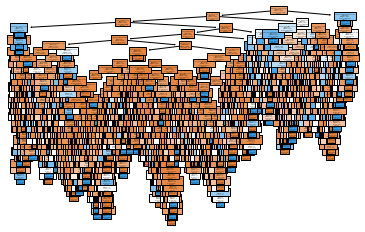

In [103]:
fig = plt.figure(num=None)
_ = tree.plot_tree(clf, 
                   feature_names=feature_names1,  
                   class_names=['0','1'],
                   filled=True)

In [122]:
#https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
#step1: importing classifier or reressor
from sklearn.tree import DecisionTreeClassifier

In [123]:
#step 2: create an instance of classifier
model = DecisionTreeClassifier(max_depth=2) 

#Training the model based on whole data
model.fit(X,y)

DecisionTreeClassifier(max_depth=2)

In [124]:
#Plotting the trained Decision Tree
from sklearn.tree import plot_tree

[Text(0.5, 0.8333333333333334, 'loan_percent_income <= 0.305\ngini = 0.5\nsamples = 14178\nvalue = [7089, 7089]'),
 Text(0.25, 0.5, 'loan_int_rate <= 2.638\ngini = 0.478\nsamples = 11136\nvalue = [6737, 4399]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.388\nsamples = 8165\nvalue = [6018, 2147]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.367\nsamples = 2971\nvalue = [719, 2252]'),
 Text(0.75, 0.5, 'customer_home_ownership_RENT <= 0.5\ngini = 0.205\nsamples = 3042\nvalue = [352, 2690]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.5\nsamples = 702\nvalue = [352, 350]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.0\nsamples = 2340\nvalue = [0, 2340]')]

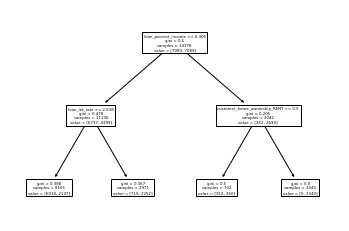

In [125]:
plot_tree(model, feature_names=feature_names1 )

### For not balanced data (Actual data)

In [152]:
DT =DecisionTreeClassifier()
param= {'criterion':['gini','entropy'],'max_depth':[3,4,5,6,7,8],'min_samples_split':[3,4,5,6],'min_samples_leaf':[2,3,4]}
model=GridSearchCV(DT,param,cv=5,scoring='f1')
model.fit(X1_train,y1_train)
model.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'min_samples_leaf': 4,
 'min_samples_split': 3}

In [153]:
"""K-FOLD CROSSVALIDATION without balancing'"""
DT=model.best_estimator_
# DT =DecisionTreeClassifier(criterion='entropy',
#                             max_depth= 5,
#                             min_samples_leaf= 2,
#                             min_samples_split= 3)
scores=cross_val_score(DT,X1,y1,cv=5)
DT_score=scores.mean()
DT_score

0.8089951567525615

In [154]:
DT=model.best_estimator_
scores=cross_val_score(DT,X1,y1,cv=5,scoring='f1')
DT_f1score=scores.mean()
DT_f1score

0.778376327098057

## Let's compare to logitic regression that is so sensitive to imbalaced data

In [155]:
#import classifier
#from sklearn.tree import DecisionTreeClassifier

#create an instanse
DT =DecisionTreeClassifier(criterion='entropy',
                             max_depth= 5,
                           min_samples_leaf= 2,
                             min_samples_split= 3)

#train model
DT.fit(X1_train,y1_train)

#predict on test set
y_pred = DT.predict(X1_test)

### Model evaluation

In [156]:
print('accuracy_score =')
accuracy_score(y1_test,y_pred)

accuracy_score =


0.8293370944992948

In [157]:
print('confusion_matrix =')
confusion_matrix(y1_test,y_pred)

confusion_matrix =


array([[1590,  152],
       [ 453, 1350]], dtype=int64)

In [158]:
print(classification_report(y1_test,y_pred)) #DT

              precision    recall  f1-score   support

           0       0.78      0.91      0.84      1742
           1       0.90      0.75      0.82      1803

    accuracy                           0.83      3545
   macro avg       0.84      0.83      0.83      3545
weighted avg       0.84      0.83      0.83      3545



## DecisionTreeClassifier Vs. LogisticRegression for imbalanced data

In [159]:
#import classifier
#from sklearn.linear_model import LogisticRegression

#create an instanse
LR = LogisticRegression()

#train model
LR.fit(X1_train,y1_train)

#predict on test set
y_pred = LR.predict(X1_test)

### Model evaluation

In [160]:
print('accuracy_score =')
accuracy_score(y1_test,y_pred)

accuracy_score =


0.8090267983074754

In [161]:
print('confusion_matrix =')
confusion_matrix(y1_test,y_pred)

confusion_matrix =


array([[1430,  312],
       [ 365, 1438]], dtype=int64)

In [162]:
print(classification_report(y1_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1742
           1       0.82      0.80      0.81      1803

    accuracy                           0.81      3545
   macro avg       0.81      0.81      0.81      3545
weighted avg       0.81      0.81      0.81      3545



# """Ensemble"""

# Random Forest

In [163]:
#etep 1 importing classifier
from sklearn.ensemble import RandomForestClassifier

In [164]:
#step 2 create an instance from that cliassifier
model7=RandomForestClassifier(max_depth=3,n_estimators=20,random_state=0)

In [165]:
#step3 fit that model on train data set
model7.fit(X_train,y_train)

RandomForestClassifier(max_depth=3, n_estimators=20, random_state=0)

In [166]:
#step4 use fitted model for prediction on test data set
y_pred7 =model7.predict(X_test)

In [167]:
#model evaluation
model7.score(X_test,y_test)

0.7991537376586741

In [168]:
print(classification_report(y_test,y_pred7))

              precision    recall  f1-score   support

           0       0.75      0.89      0.81      1742
           1       0.87      0.71      0.78      1803

    accuracy                           0.80      3545
   macro avg       0.81      0.80      0.80      3545
weighted avg       0.81      0.80      0.80      3545



Let's find the best depth for trees

In [170]:
scores = []
for i in range(1,14):
    dt = RandomForestClassifier(max_depth=i,n_estimators=20,random_state=0)
    scores.append(cross_val_score(dt,X,y,cv=5).mean())

Text(0.5, 1.0, 'Finding optimal max_depth')

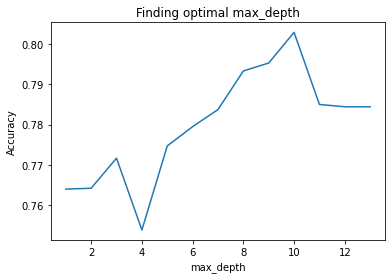

In [171]:
plt.plot(range(1,14),scores)
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.title("Finding optimal max_depth")

In [172]:
scores = []
for i in range(1,14):
    dt = RandomForestClassifier(max_depth=i,n_estimators=20,random_state=0)
    scores.append(cross_val_score(dt,X,y,cv=5,scoring='f1').mean())

Text(0.5, 1.0, 'Finding optimal max_depth')

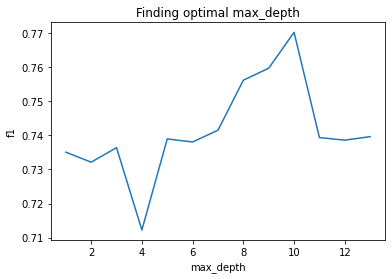

In [173]:
plt.plot(range(1,14),scores)
plt.xlabel("max_depth")
plt.ylabel("f1")
plt.title("Finding optimal max_depth")

In [174]:
model72=RandomForestClassifier(max_depth=1,n_estimators=20,random_state=0)

In [175]:
model72.fit(X_train,y_train)

RandomForestClassifier(max_depth=1, n_estimators=20, random_state=0)

In [176]:
#step4 use fitted model for prediction on test data set
y_pred72 =model72.predict(X_test)

In [177]:
model72.score(X_test,y_test)

0.7754583921015514

In [178]:
print(classification_report(y_test,y_pred72))# RF

              precision    recall  f1-score   support

           0       0.73      0.86      0.79      1742
           1       0.84      0.69      0.76      1803

    accuracy                           0.78      3545
   macro avg       0.78      0.78      0.77      3545
weighted avg       0.78      0.78      0.77      3545



# Tunning

In [194]:
param_grid={'n_estimators':range(10,110,10),'max_depth':[1,2,3,5,7],'min_samples_split':[3,5],'criterion':['gini','entropy']}

In [198]:
#model73=RandomForestClassifier(criterion='gini',max_depth=7,min_samples_split= 5,n_estimators=30,random_state=0)
model73=grid.best_estimator_

In [199]:
model73.fit(X_train,y_train)

SGDClassifier(alpha=0.001, eta0=0.1, learning_rate='invscaling',
              loss='modified_huber')

In [201]:
y_pred73 =model73.predict(X_test)

## Model evaluation

In [202]:
accuracy_score(y_test,y_pred73)

0.7918194640338505

In [203]:
confusion_matrix(y_test,y_pred73 )

array([[1547,  195],
       [ 543, 1260]], dtype=int64)

In [204]:
print(classification_report(y_test,y_pred73)) #RF

              precision    recall  f1-score   support

           0       0.74      0.89      0.81      1742
           1       0.87      0.70      0.77      1803

    accuracy                           0.79      3545
   macro avg       0.80      0.79      0.79      3545
weighted avg       0.80      0.79      0.79      3545



In [205]:
"""K-FOLD CROSSVALIDATION"""
RF=grid.best_estimator_
RFscores=cross_val_score(RF,X,y,cv=5)

In [206]:
RF_DS_score=RFscores.mean()
RF_DS_score

0.7639281796404505

In [207]:
RF=grid.best_estimator_
scores=cross_val_score(RF,X,y,cv=5,scoring='f1')
RF_DS_f1score=scores.mean()
RF_DS_f1score

0.7559484271219054

## For not balanced data

In [195]:
clf7=GridSearchCV(RandomForestClassifier(random_state=0),param_grid,cv=5,scoring='f1')
clf7.fit(X1,y1)
clf7.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'min_samples_split': 5,
 'n_estimators': 60}

In [196]:
"""K-FOLD CROSSVALIDATION for not balanced data """
RF=clf7.best_estimator_
scores=cross_val_score(RF,X1,y1,cv=5)
RF_score=scores.mean()
RF_score

0.7891709763359975

In [197]:
RF=clf7.best_estimator_
scores=cross_val_score(RF,X1,y1,cv=5,scoring='f1')
RF_f1score=scores.mean()
RF_f1score

0.7484095467133132

# Adaboost

In [182]:
from sklearn.ensemble import AdaBoostClassifier

In [183]:
model8= AdaBoostClassifier(random_state=0)

In [184]:
model8.fit(X_train,y_train)
model8.score(X_test,y_test)

0.8279266572637518

In [185]:
model8_2= AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),n_estimators=40,random_state=0)

In [186]:
model8_2.fit(X_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   n_estimators=40, random_state=0)

In [187]:
model8_2.score(X_test,y_test)

0.8504936530324401

In [189]:
"""K-FOLD CROSSVALIDATION"""
ADA=AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),n_estimators=20,random_state=0)
scores=cross_val_score(ADA,X,y,cv=5)
ADA_DS_score=scores.mean()
ADA_DS_score

0.793403805444238

In [190]:
"""K-FOLD CROSSVALIDATION"""
ADA=AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),n_estimators=20,random_state=0)
scores=cross_val_score(ADA,X,y,cv=5,scoring='f1')
ADA_DS_f1score=scores.mean()
ADA_DS_f1score

0.7625108051402976

### ddf not balanced Data 

# """XGBOOST"""

In [211]:
! pip install xgboost

In [212]:
import xgboost
from xgboost.sklearn import XGBClassifier

In [213]:
"""K-FOLD CROSSVALIDATION"""
XGB=XGBClassifier()
scores=cross_val_score(XGB,X,y,cv=5)
scores.mean()

0.8023629425651052

In [214]:
XGB=XGBClassifier()
scores=cross_val_score(XGB,X,y,cv=5,scoring='f1')
scores.mean()

0.7742768171278226

### Tuning

In [215]:
#param_grid={'loss':['ls', 'lad', 'huber'],'n_estimators':range(5,50,10),'max_depth':[3,4,5,6],
#            'min_samples_leaf':range(2,10,3),'max_features':['auto', 'sqrt', 'log2', None]}
param_grid={'n_estimators':range(5,30,10),'max_depth':[3,4,5]
           }
clf9=GridSearchCV(XGBClassifier(random_state=0),param_grid,cv=5,scoring='f1')
clf9.fit(X,y)
clf9.best_params_

{'max_depth': 5, 'n_estimators': 5}

In [216]:

#XGB=XGBClassifier(max_depth= 5,learning_rate=1.0,n_estimators= 75)
XGB=clf9.best_estimator_
XGB.fit(X_train,y_train)

y_pred9 =XGB.predict(X_test)

In [217]:
XGB.score(X_test,y_test)

0.8377997179125529

In [218]:
accuracy_score(y_test,y_pred9)

0.8377997179125529

In [219]:
print(classification_report(y_test,y_pred9))# XGBOOST

              precision    recall  f1-score   support

           0       0.80      0.89      0.84      1742
           1       0.88      0.78      0.83      1803

    accuracy                           0.84      3545
   macro avg       0.84      0.84      0.84      3545
weighted avg       0.84      0.84      0.84      3545



In [220]:
"""K-FOLD CROSSVALIDATION"""
XGB=clf9.best_estimator_
scores=cross_val_score(XGB,X,y,cv=5)
scores.mean()

0.8120981435461925

In [221]:
scores=cross_val_score(XGB,X,y,cv=5,scoring='f1')
scores.mean()

0.7864458992697502

In [222]:
"""K-FOLD CROSSVALIDATION"""
XGB=XGB=XGBClassifier(max_depth= 5,learning_rate=1.0,n_estimators= 75)
scores=cross_val_score(XGB,X,y,cv=5,scoring='f1')
scores.mean()

0.7715099472245889

### For not balanced data

In [223]:
"""K-FOLD CROSSVALIDATION for not balanced data"""
XGB=XGBClassifier(max_depth= 3,n_estimators= 5)
scores=cross_val_score(XGB,X1,y1,cv=5)
XGB_WB_mean=scores.mean()
scores.mean()

0.7989100578851401

In [224]:
XGB=XGBClassifier(
    max_depth= 3,n_estimators= 5)
scores=cross_val_score(XGB,X1,y1,cv=5,scoring='f1')
XGB_WB_f1=scores.mean()
scores.mean()

0.7703415150597905

# Feature selection

In [132]:
import xgboost

In [130]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

In [136]:
XGB = xgboost.XGBClassifier(max_depth=8, learning_rate=0.1, n_estimators=100, seed=8, scale_pos_weight=2)
XGB.fit(X, y)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=8, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=8,
              reg_alpha=0, reg_lambda=1, ...)

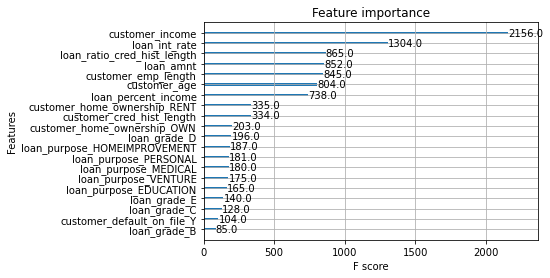

<Figure size 216x288 with 0 Axes>

In [137]:
plot_importance(XGB)
plt.figure(figsize=(3,4))
plt.show()

## Algorism Comparison 

In [143]:
# Compare Algorithms
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier 

In [146]:

# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RMF', RandomForestClassifier()))
models.append(('XGB', XGBClassifier()))
models.append(('AdaB', AdaBoostClassifier ()))

In [150]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=None)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.863923 (0.025458)
KNN: 0.868953 (0.026522)
DT: 0.870402 (0.024327)
NB: 0.850809 (0.017873)
SVM: 0.848834 (0.037577)
RMF: 0.929833 (0.008095)
XGB: 0.930728 (0.010435)
AdaB: 0.874876 (0.025267)


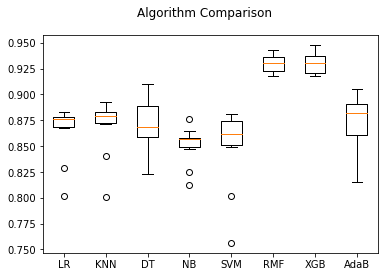

In [151]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()